
# Analyse de Performance des Ventes d'une librairie

Cette étude analyse la performance d'une grande librairie généraliste en ligne sur une période de deux ans, mettant en lumière ses points forts, ses points faibles et les comportements de sa clientèle. 

Le processus d'analyse débute par l'exploration et la préparation des données. Les vérifications sont effectuées à travers l'examen des dataframes dédiés aux clients, produits et transactions, suivies de jointures pour une meilleure contextualisation des informations. 

L'analyse se focalise sur des indicateurs clés comme le chiffre d'affaires total, la distribution du chiffre d'affaires entre les clients, le chiffre d'affaires par mois, sexe et tranche d'âge. En outre, des investigations portent sur le nombre de transactions, le panier moyen et la fréquence d'achats. Enfin, l'étude se termine en mettant l'accent sur les catégories de produits ainsi que sur les références les plus performantes et celles requérant une attention particulière.

Des tests statistiques complémentaires sont réalisés pour renforcer la validité des observations. Cette analyse offre ainsi une vision approfondie de la performance de la librairie en ligne, fournissant des insights essentiels pour des améliorations stratégiques.

##  SOMMAIRE

* [1. Préparation et exploration des données](#chapter1)
    * [1.1 Importation des librairies Python](#section_1_1)
    * [1.2 Importation des données](#section_1_2)
    * [1.3 Vérification des données](#section_1_3)
        * [1.3.1 Dataframe 'customers'](#section_1_3_1)
        * [1.3.2 Dataframe 'products'](#section_1_3_2)
        * [1.3.3 Dataframe 'transactions'](#section_1_3_3)
    * [1.4 Jointures](#section_1_4)
        * [1.4.1 Jointure 'transactions' et 'products'](#section_1_4_1)
        * [1.4.2 Jointure 'transactions_products' et 'customers'](#section_1_4_2)
        
        
* [2. Analyse des données](#chapter2)
    * [2.1 Analyse du Chiffre d'affaires](#section_2_1)
        * [2.1.1 Chiffre d'affaires total](#section_2_1_1)
        * [2.1.2 Répartition du CA entre les clients](#section_2_1_2)
        * [2.1.3 CA par mois](#section_2_1_3)
        * [2.1.4 CA par sex](#section_2_1_4)
        * [2.1.5 CA par âge](#section_2_1_5)
    * [2.2 Analyse du nombre de transactions](#section_2_2)
        * [2.2.1 Nombre de transactions par tranche d'âge et par catégorie](#section_2_2_1)
        * [2.2.2 Nombre de transactions par sex et par catégorie](#section_2_2_2)
    * [2.3 Etude du panier moyen et de la fréquence d'achats](#section_2_3)
        * [2.3.1 Panier moyen et Fréquence d'achats](#section_2_3_1)
        * [2.3.2 Corrélation entre l'âge des clients et le montant du panier moyen ](#section_2_3_2)
        * [2.3.3 Relation entre l'âge des clients et la taille du panier moyen ](#section_2_3_3)
        * [2.3.4 Relation entre l'âge des clients et la fréquence d'achats ](#section_2_3_4)
        * [2.3.5 Profils d'acheteurs selon les Tranches d'Âge](#section_2_3_5)
    * [2.4 Zoom sur les catégories et les références produits](#section_2_4)
        * [2.4.1 Zoom sur les catégories](#section_2_4_1)
        * [2.4.2 Top et Flop des ventes](#section_2_4_2)


* [3. Bilan de l'analyse](#chapter3)


## 1 Exploration et préparation des données<a id="chapter1"></a>

### 1.1 Importation des librairies Python <a class="anchor" id="section_1_1"></a> 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from datetime import datetime

import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, shapiro
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu

### 1.2 Importation des données <a class="anchor" id="section_1_2"></a>

On dispose de 3 jeux de données nous donnnant des informations sur les clients, les produits et les transactions.

In [2]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

### 1.3 Vérification des données <a class="anchor" id="section_1_3"></a>

#### 1.3.1 Dataframe 'customers' <a class="anchor" id="section_1_3_1"></a>

Le df 'customers' recense l'identifiant, le sexe et l'année de naissance de 8623 clients.

In [3]:
customers.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
len(customers)

8623

#####  Vérification et Transformation de types de données

In [5]:
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [6]:
# Transformation du type de données
customers['client_id'] = customers['client_id'].astype('string')
customers['sex'] = customers['sex'].astype('string')
customers.dtypes

client_id    string
sex          string
birth         int64
dtype: object

##### Vérification des valeurs manquantes

In [7]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

Les variables ne contiennent aucune valeur manquante.

#####  Recherche des doublons "client_id"

In [8]:
customers['client_id'].duplicated().sum() 

0

La table ne contient aucun doublon 'client_id' .

##### Vérification de la variable 'birth'

In [9]:
minimum = np.min(customers['birth'])
minimum

1929

In [10]:
maximum = np.max(customers['birth'])
maximum

2004

Les années de naissance des clients s'étalent de 1929 à 2004.

##### Vérification de la variable 'sex'

In [11]:
customers['sex'].unique()

<StringArray>
['f', 'm']
Length: 2, dtype: string

La variable 'sex' affiche 2 modalités : f (féminin) et m (masculin).

#### 1.3.2 Dataframe 'products' <a class="anchor" id="##section_1_3_2"></a>

Ce df nous informe sur l'identifiant, le prix et la catégorie de 3287 produits.

In [12]:
products.head(5)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [13]:
len(products)

3287

#####  Vérification et Transformation de types de données

In [14]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [15]:
# Transformation du type de données
products['id_prod'] = products['id_prod'].astype('string')
products.dtypes

id_prod     string
price      float64
categ        int64
dtype: object

##### Vérification de la variable 'categ'

In [16]:
products['categ'].unique()

array([0, 1, 2], dtype=int64)

La variable 'categ' compte 3 modalités : 0, 1 et 2.

In [17]:
# Nombre de produits par catégorie 
print(products['categ'].value_counts())
# Pourcentage des produits par catégorie
pourcentages = products['categ'].value_counts(normalize=True) * 100
print(pourcentages)

0    2309
1     739
2     239
Name: categ, dtype: int64
0    70.246425
1    22.482507
2     7.271068
Name: categ, dtype: float64


70 % des produits vendus relèvent de la catégorie 0, 23 % de la catégorie 1 et 7 % de la catégorie 2.

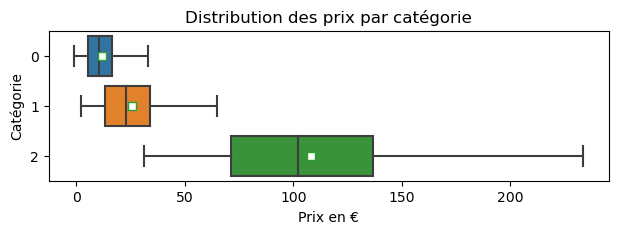

Moyenne de prix par catégorie categ
0     11.727280
1     25.531421
2    108.354686
Name: price, dtype: float64


In [18]:
# Distribution et moyenne des prix par catégorie
plt.figure(figsize=(8,3))
sns.boxplot(data=products, y='categ', x='price', orient='h', showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des prix par catégorie')
plt.xlabel('Prix en €', fontsize= 10)
plt.ylabel('Catégorie', fontsize= 10)
plt.savefig('prixcateg.png')
plt.subplots_adjust(left=0.2, bottom=0.3, right=0.9, top=0.8)
plt.show()
# Moyenne de prix par catégorie
print("Moyenne de prix par catégorie",products.groupby('categ').mean()['price'])

Les produits de la catégorie 2 sont en général les plus chers avec un prix moyen de 108 €, suivi de la cétgorie 1 avec un prix moyen de 26 € et la catégorie 0 à 12 € en moyenne.

##### Vérification des valeurs manquantes

In [19]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

Les variables ne contiennent aucune valeur manquante.

#####  Recherche des doublons  'id_prod'

In [20]:
products['id_prod'].duplicated().sum() 

0

La table ne contient aucun doublon 'id_prod'.

##### Recherche d'outliers price

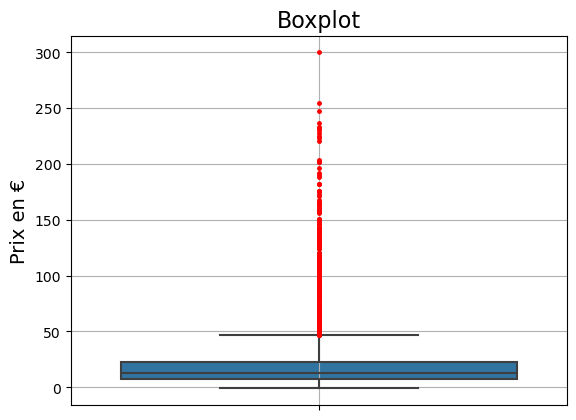

In [21]:
# Visualisation de la répartition des prix et outliers
flierprops = dict(marker='o', markersize=2.5, markeredgecolor='red', markerfacecolor='red', alpha=1)
sns.boxplot(y=products['price'],flierprops=flierprops )
plt.grid()
plt.ylabel('Prix en €', fontsize= 14)
plt.title('Boxplot', fontsize= 16)
plt.savefig('boxplot.png')

In [22]:
#On calcule Q1
Q1=products['price'].quantile(q=0.25)

#On calcule Q3
Q3=products['price'].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)
IQR=Q3-Q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
borne_inf = Q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
borne_sup = Q3 +1.5*IQR

# Outliers 
outliers_sup = products[products['price']>borne_sup]
outliers_inf =products[products['price']<borne_inf]

outliers_inff=outliers_inf['id_prod'].count()
outliers_supp=outliers_sup['id_prod'].count()

part_outliers = round(outliers_supp/len(products)*100,2)

In [23]:
outliers_sup.sort_values(by = 'price', ascending = False)

,id_prod,price,categ
947,2_2,300.00,2
724,2_76,254.44,2
394,2_158,247.22,2
1436,2_167,236.99,2
2779,2_30,233.54,2
...,...,...,...
3169,1_626,47.35,1
2966,1_620,47.30,1
49,1_48,47.22,1
2266,1_569,46.99,1


In [24]:
print(outliers_inff, 'outlier inférieur et',outliers_supp,'outliers supérieurs qui correspondent à',part_outliers ,
      '% des références produits.')
print('Après vérification, les prix des outliers ne sont pas aberrants. Nous décidons donc de les garder.')

0 outlier inférieur et 302 outliers supérieurs qui correspondent à 9.19 % des références produits.
Après vérification, les prix des outliers ne sont pas aberrants. Nous décidons donc de les garder.


In [25]:
# Indicateurs statistiques
products.describe(include='all') 

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


La variable 'price' compte des prix de -1 à 300€. Le produit T_0 est le seul à afficher un prix négatif de -1. Il faudra nettoyer cette valeur aberrante ultérieurement.

#### 1.3.3 Dataframe 'transactions' <a class="anchor" id="section_1_3_3"></a>

Le dataframe 'transactions' détaille la date et les identifiants de session, du client et du produit vendu.

In [26]:
transactions.head(5)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [27]:
len(transactions)

679532

#####  Vérification et Transformation de types de données

In [28]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [29]:
# Transformation du type de données
transactions['id_prod'] = transactions['id_prod'].astype('string')
transactions['session_id'] = transactions['session_id'].astype('string')
transactions['client_id'] = transactions['client_id'].astype('string')

##### Vérification des valeurs manquantes

In [30]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

##### Vérification des doublons

In [31]:
transactions.duplicated().sum()

126

In [32]:
# Suppression des doublons
transactions.drop_duplicates(inplace=True) 

### 1.4 Jointures <a class="anchor" id="section_1_4"></a>

#### 1.4.1 Jointure transactions_products <a class="anchor" id="section_1_4_1"></a>

In [33]:
len(transactions)

679406

In [34]:
# Jointure des df transactions et products
transactions_products = pd.merge(transactions,products, how='left')
transactions_products

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0
...,...,...,...,...,...,...
679401,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0
679402,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0
679403,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0
679404,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0


#### 1.4.2 Jointure transactions_products et customers <a class="anchor" id="section_1_4_2"></a>

In [35]:
# Jointure du df transactions_products et customers
transactions = pd.merge(transactions_products,customers, how='left')
transactions

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980
...,...,...,...,...,...,...,...,...
679401,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951
679402,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977
679403,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988
679404,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986


##### Nettoyage des dates

En voulant convertir les dates en datetime, nous nous sommes rendus compte que certaines dates commençant par "test_" posaient problème. Nous allons répertorier l'ensemble de ces dates problématiques.

In [36]:
#Les 75 premiers individus triés par date
transactions_test = transactions.sort_values(by='date', ascending=False).head(75).reset_index() 
transactions_test

,index,id_prod,date,session_id,client_id,price,categ,sex,birth
0,246952,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0,-1.00,0.0,f,2001
1,670556,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,-1.00,0.0,m,2001
2,19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0,-1.00,0.0,f,2001
3,392385,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0,-1.00,0.0,f,2001
4,312655,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1,-1.00,0.0,m,2001
...,...,...,...,...,...,...,...,...,...
70,85484,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1,-1.00,0.0,m,2001
71,103116,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0,-1.00,0.0,f,2001
72,607783,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0,-1.00,0.0,f,2001
73,91131,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1,-1.00,0.0,m,2001


In [37]:
transactions

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980
...,...,...,...,...,...,...,...,...
679401,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951
679402,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977
679403,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988
679404,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986


In [38]:
# Regroupement des lignes problématiques
lignes_test = transactions[ (transactions['date'].str.contains('test_')) & (transactions['price']<=0)]
lignes_test

,id_prod,date,session_id,client_id,price,categ,sex,birth
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,-1.0,0.0,f,2001
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,-1.0,0.0,f,2001
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,-1.0,0.0,m,2001
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,-1.0,0.0,f,2001
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,-1.0,0.0,f,2001
...,...,...,...,...,...,...,...,...
577222,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0,-1.0,0.0,f,2001
592959,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1,-1.0,0.0,m,2001
607783,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0,-1.0,0.0,f,2001
625936,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0,-1.0,0.0,f,2001


La variable 'date' affiche 74 valeurs aberrantes ayant pour préfixe" test_". 
Ces 74 individus concernent le produit T_0 au prix négatif -1.

Nous décidons donc de supprimer ces lignes.

In [39]:
# Suppression des lignes tests
transactions = transactions.drop(lignes_test.index).reset_index() 

Maintenant que le problème des lignes test a été réglé, nous pouvons convertir les dates au format datetime.

In [40]:
# Conversion de 'date' en datetime
from datetime import datetime
transactions['date']= pd.to_datetime(transactions['date'], format='%Y-%m-%d')
transactions.sort_values(by='date', ascending=False)

,index,id_prod,date,session_id,client_id,price,categ,sex,birth
84255,84272,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575,4.52,0.0,f,1981
550293,550360,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0.0,m,1953
130140,130169,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1.0,f,1985
588008,588078,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2.0,f,1994
184602,184636,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,21.92,1.0,f,1996
...,...,...,...,...,...,...,...,...,...
438944,439006,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956
488153,488217,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989
462563,462626,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988
428350,428412,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960


Les dates s'étendent du 2021-03-01 au 2023-02-28.

In [41]:
# Création d'une colonne 'mois' au format AAAA-mm
transactions['mois']= transactions['date'].dt.strftime('%Y-%m')
transactions

,index,id_prod,date,session_id,client_id,price,categ,sex,birth,mois
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05
1,1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02
2,2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,2022-06
3,3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06
4,4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01
...,...,...,...,...,...,...,...,...,...,...
679327,679401,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022-01
679328,679402,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022-03
679329,679403,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022-12
679330,679404,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021-07


##### Vérification des valeurs manquantes et traitement

In [42]:
transactions.isnull().sum()

index           0
id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
sex             0
birth           0
mois            0
dtype: int64

In [43]:
print("Les valeurs manquantes ne représentent que",round((221/679532*100),2),
      "% du dataset, nous pourrions les supprimer sans fausser l'analyse.")

Les valeurs manquantes ne représentent que 0.03 % du dataset, nous pourrions les supprimer sans fausser l'analyse.


On peut également déterminer une valeur fixe pour les 2 variables.
Regardons de plus près la liste des produits ayant des valeurs de 'price' et 'categ' manquantes.

In [44]:
# Individus sans prix ni catégorie
transactions_nan = transactions[(transactions['price'].isnull()) & (transactions['categ'].isnull())] 
transactions_nan

,index,id_prod,date,session_id,client_id,price,categ,sex,birth,mois
2633,2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,m,1940,2022-09
10103,10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,f,1963,2022-07
11723,11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,m,1978,2022-12
15670,15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,m,1991,2021-08
16372,16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,m,1973,2022-07
...,...,...,...,...,...,...,...,...,...,...
669533,669606,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,m,1981,2021-08
670484,670558,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,f,1979,2022-03
671088,671162,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,m,1981,2022-05
675480,675554,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,m,1986,2022-02


In [45]:
transactions_nan['id_prod'].unique()

<StringArray>
['0_2245']
Length: 1, dtype: string

Les 221 valeurs manquantes correspondent à un seul et unique produit 0_2245.

Pour remplacer la catégorie, on peut se fier aux préfixes des identifiants de produits : 0_, 1_ et 2_. Ces préfixes correspondent à la catégorie du produit concerné. 

On choisit donc 0 comme catégorie du produit 0_2245.

In [46]:
# Création d'un df Transactions_test 
transactions_test = transactions.dropna() 

# Boucle sur les catégories uniques dans la colonne 'categ'
for cat in transactions_test['categ'].unique():
    
    # Sélectionnez les lignes de la catégorie donnée
    cat_df = transactions_test[transactions_test['categ'] == cat]
    
    # Sélectionnez les 2 premiers caractères de la colonne 'id_prod' et convertissez-les en chaîne de caractères
    cat_df['id_prod'] = cat_df['id_prod'].astype(str).str[:2]
    
    # Afficher les 2 premiers caractères uniques pour la catégorie donnée
    print(f"Catégorie {cat}: {', '.join(cat_df['id_prod'].unique())}")

C:\Users\aicha\AppData\Local\Temp\ipykernel_15288\2873112645.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['id_prod'] = cat_df['id_prod'].astype(str).str[:2]


Catégorie 0.0: 0_
Catégorie 1.0: 1_
Catégorie 2.0: 2_


In [47]:
# Remplacement des valeurs manquantes de la variable 'categ' par 0
transactions['categ'].replace(np.nan, 0, inplace=True)

In [48]:
# Calcul des prix moyen, médian et du mode pour les produits de la catégorie 0
print('Catégorie 0 :',
    '\n- Prix moyen :', round(transactions[transactions['categ']==0]['price'].mean(), 2), # Prix moyen
    '\n- Prix médian :', transactions[transactions['categ']==0]['price'].median(), # Prix médian
    '\n- Mode :', transactions[transactions['categ']==0]['price'].mode().values[0]) # Prix le plus fréquent

Catégorie 0 : 
- Prix moyen : 10.64 
- Prix médian : 9.99 
- Mode : 4.99


Les prix moyen et médian sont proches. On retient 9.99€ comme valeur de remplacement.

In [49]:
# Remplacement des valeurs manquantes de la variable 'price' par la valeur médiane
transactions['price'].replace(np.nan, 9.99, inplace=True)
transactions.isnull().sum()

index         0
id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
mois          0
dtype: int64

## 2 Analyse des données <a class="anchor" id="chapter2"></a>

### 2.1 Chiffre d’affaires <a class="anchor" id="section_2_1"></a>

#### 2.1.1 Chiffre d’affaires total <a class="anchor" id="section_2_1_1"></a>

In [50]:
# Calcul du CA total
CA = transactions['price'].sum()
print("Le Chiffre d'affaires total s'élève à",round(CA,2), "€")

Le Chiffre d'affaires total s'élève à 11855936.47 €


#### 2.1.2 Répartition du CA entre les clients <a class="anchor" id="section_2_1_2"></a>

##### CA par client

In [51]:
# Regroupement du CA par client_id
CA_client =transactions.groupby(by=['client_id'], as_index=False)[['price']].sum()
CA_client = CA_client.rename(columns = {'price' : 'CA'})

# Joindre le dataframe CA_client avec le dataframe transactions pour ajouter la colonne "sex"
CA_client = pd.merge(CA_client, customers[['client_id', 'sex']], on='client_id', how='left')

# Afficher les client-id par ordre de CA décroissant
CA_client.sort_values(by = 'CA', ascending = False)

,client_id,CA,sex
677,c_1609,324033.35,m
4388,c_4958,289760.34,m
6337,c_6714,153658.86,f
2724,c_3454,113667.90,m
2513,c_3263,5276.87,f
...,...,...,...
4044,c_4648,11.20,m
1556,c_240,11.06,m
7889,c_8114,9.98,m
7918,c_8140,8.30,m


Nous observons que 4 gros clients se démarquent: c_1609, c_4958, c_6714,c_3454

Nous allons séparer le dataframe CA_client en CA_client_B2B (clients professionnels) et CA_client_B2C (clients particuliers.

In [54]:
# Séparation des clients B2B et B2C
clients_B2B = ['c_1609', 'c_4958', 'c_6714','c_3454']

CA_client_B2B = CA_client[CA_client.client_id.isin(clients_B2B)]
CA_client_B2C = CA_client[~CA_client.client_id.isin(clients_B2B)] 

transactions_client_B2B = transactions[transactions.client_id.isin(clients_B2B)].count()

print('Les 4 gros clients, qui représentent',round((4/8600)*100,2),
      '% des clients,ont généré',transactions_client_B2B['session_id'],'transactions soit',round((46634
       /len(transactions)*100),2), '% des transactions et',round((CA_client_B2B['CA'].sum()/CA)*100,2),'% du CA total.')

Les 4 gros clients, qui représentent 0.05 % des clients,ont généré 46643 transactions soit 6.86 % des transactions et 7.43 % du CA total.


##### Répartition du chiffre d'affaires entre les clients: Courbe de Lorrentz

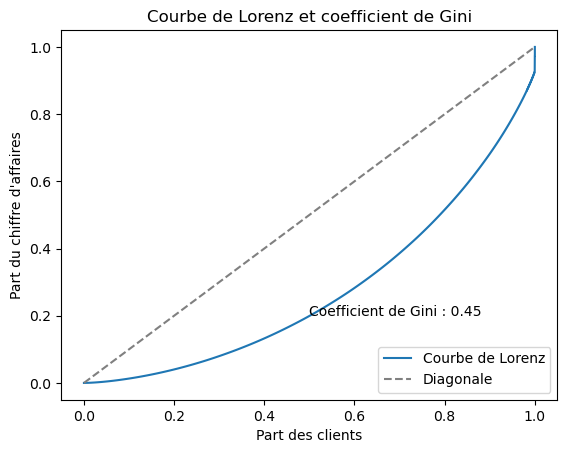

In [55]:
CA_clients = CA_client['CA'].values
n = len(CA_clients)

# Tri des valeurs de CA par ordre croissant
CA_clients_sorted = np.sort(CA_clients)

# Calcul de la courbe de Lorenz
lorenz = np.cumsum(CA_clients_sorted) / np.sum(CA_clients_sorted)

# Ajout du point (0, 0) pour obtenir une courbe fermée
lorenz = np.append([0], lorenz)

# Calcul du coefficient de Gini
AUC = np.trapz(lorenz, dx=1./n)
S = 0.5 - AUC
gini = 2*S

# Affichage de la courbe de Lorenz et du coefficient de Gini
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 1, n+1), lorenz, drawstyle='steps-post', label='Courbe de Lorenz')
ax.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Diagonale')
ax.legend(loc='lower right')
plt.title("Courbe de Lorenz et coefficient de Gini")
plt.xlabel("Part des clients")
plt.ylabel("Part du chiffre d'affaires")
plt.text(0.5, 0.2, f'Coefficient de Gini : {gini:.2f}')

plt.savefig('lorrentz.png')
plt.show()

L'indice de Gini est un nombre compris entre 0 et 1 qui mesure l'inégalité de la répartition d'une variable. Plus l'indice de Gini est proche de 0, plus la répartition est égalitaire, et plus l'indice de Gini est proche de 1, plus la répartition est inégalitaire.

Dans notre cas, un indice de Gini de 0,45 indique une inégalité modérée dans la répartition du chiffre d'affaires entre les clients. Cela signifie que certains clients génèrent une part importante du chiffre d'affaires total, tandis que d'autres clients génèrent une part relativement faible.

#### 2.1.3 Chiffre d’affaires par mois<a class="anchor" id="section_2_1_3"></a>

In [56]:
# Cacul du CA total par mois
CA_mois =transactions.groupby(by=['mois'], as_index=False)[['price']].sum()
CA_mois=CA_mois.rename(columns = {'price' : 'CA'})
CA_mois

,mois,CA
0,2021-03,482530.52
1,2021-04,476249.16
2,2021-05,493023.39
3,2021-06,484158.49
4,2021-07,482875.36
5,2021-08,482374.70
6,2021-09,507360.56
7,2021-10,320868.67
8,2021-11,516267.63
9,2021-12,525987.21


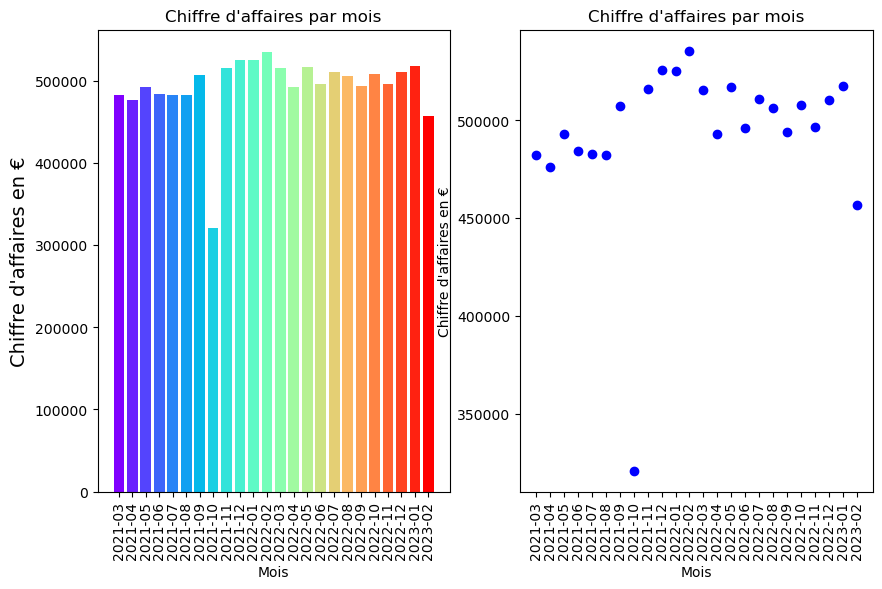

<Figure size 640x480 with 0 Axes>

In [57]:
# Visualisation de l'évolution du Chiffre d'affaires par mois
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
# Visualisation avec diagramme en barre
plt.bar(CA_mois['mois'].astype(str),CA_mois['CA'],color = cm.rainbow(np.linspace(0, 1, len(CA_mois)))) 
plt.xlabel('Mois')
plt.ylabel("Chiffre d'affaires en €", fontsize=14)
plt.xticks(rotation = '90')
plt.title("Chiffre d'affaires par mois")


plt.subplot(1, 2, 2)
# Chiffre d'affaires par mois
mois = CA_mois['mois'].astype(str)
CA = CA_mois['CA']
# Visualisation avec un nuage de points
plt.scatter(mois, CA, color='b')
plt.xlabel('Mois')
plt.ylabel("Chiffre d'affaires en €")
plt.title("Chiffre d'affaires par mois")
plt.xticks(rotation=90)
plt.show()

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.savefig('CA_mois.png')
plt.show()

Nous observons que le chiffre d'affaires du mois d'octobre 2021 est anormalement bas par rapport aux autres mois.

Regardons le nombre de transactions de ce mois d'octobre 2021 par rapport aux autres mois...

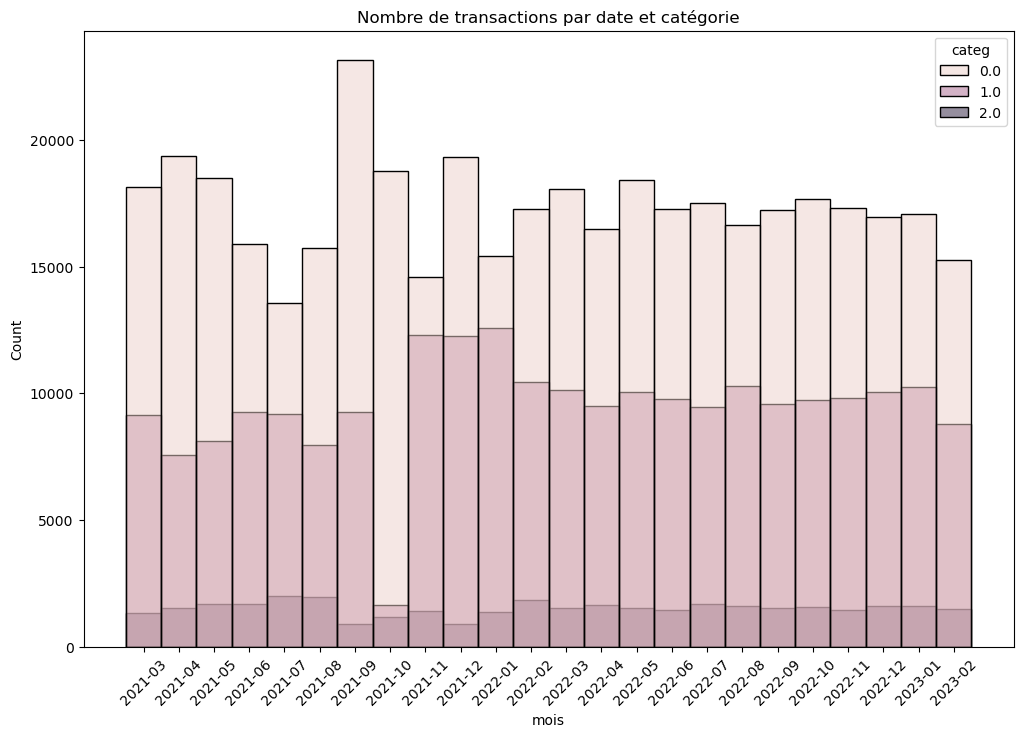

In [58]:
# Tri des données par ordre chronologique des mois
transactions = transactions.sort_values(by='mois')

# Création de l'histogramme
plt.figure(figsize=(12,8))
sns.histplot(data=transactions, x='mois', hue='categ')
plt.title('Nombre de transactions par date et catégorie')

# Obtention des étiquettes des mois triées
mois_labels = transactions['mois'].unique()

# Modification de l'ordre des étiquettes des axes x
plt.xticks(range(len(mois_labels)), mois_labels, rotation=45)

plt.savefig('nbre_transactions_mois_avant.png')
plt.show()

L'histogramme du nombre de transactions par mois et par catégorie de produits nous montre que les données au mois d'octobre dans la catégorie 1 ne sont pas cohérentes avec les données des autres mois.

In [59]:
# Transactions du mois octobre, toutes catégories
octobre = transactions[(transactions['date']>='2021-10-01') & (transactions['date']<='2021-10-31')]

# Pourcentage du dataset
print('Le mois d\'octobre correspond à',len(octobre),'transactions soit ', round((len(octobre) / len(transactions) * 100), 2), 
      '% des transactions. Nous pourrions les supprimer sans fausser l\'analyse.')

Le mois d'octobre correspond à 20668 transactions soit  3.04 % des transactions. Nous pourrions les supprimer sans fausser l'analyse.


Nous décidons de remplacer les données du mois d'octobre 2021 par les données du mois d'octobre de l'année suivante.

In [60]:
# Suppression des données du mois d'octobre 2021
transactions = transactions.loc[~(transactions['mois'] == '2021-10')]

# Duplication des lignes correspondant au mois d'octobre 2022
oct_2022 = transactions.loc[(transactions['mois'] == '2022-10')]
oct_2022.loc[:, 'mois'] = '2021-10'

# Concaténation des données originales (sans octobre 2021) et des données dupliquées pour octobre 2021
transactions = pd.concat([transactions, oct_2022], ignore_index=True)

C:\Users\aicha\AppData\Local\Temp\ipykernel_15288\1618479245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oct_2022.loc[:, 'mois'] = '2021-10'


##### Evolution du CA dans le temps et décomposition en moyenne mobile trimestrielle

Regardons l’évolution du CA dans le temps et décomposition en moyenne mobile trimestrielle pour évaluer la tendance globale .

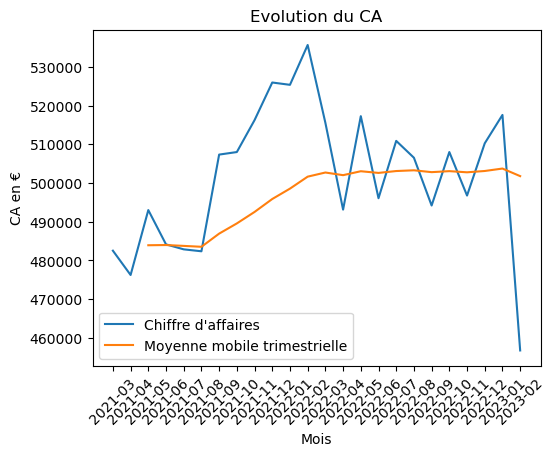

In [61]:
# Regroupement par mois et calcul du chiffre d'affaires total
transactions_mois =  transactions.groupby('mois')['price'].sum()

# Calcul de la moyenne mobile sur tous les 3 mois
rolling_mean = transactions_mois.rolling(window=len(transactions_mois), min_periods=3).mean()

# Tracer le chiffre d'affaires total et la moyenne mobile sur un graphique
plt.plot(transactions_mois.index, transactions_mois.values, label="Chiffre d'affaires")
plt.plot(rolling_mean.index, rolling_mean.values, label="Moyenne mobile trimestrielle")

plt.xlabel('Mois')
plt.ylabel('CA en €')
plt.title('Evolution du CA')
plt.xticks(rotation=45)
plt.legend()

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
plt.savefig('Evolution_CA_mois.png')
plt.show()

En observant la moyenne mobile trimestrielle, nous notons en début d'année un CA moyen d'environ 485 000 € par mois. 

En milieu d'année 2021, une hausse du CA est visible pour atteindre en début d'année 2022 un plateau à 500 000 € qui se maintient.

#### 2.1.4 Chiffre d’affaires par categorie <a class="anchor" id="section_2_1_4"></a>

In [62]:
# Regroupement des CA par catégorie
CA_categ =transactions.groupby(by=['categ'], as_index=False)[['price']].sum()
CA_categ = CA_categ.rename(columns = {'price' : 'CA'})
CA_categ

,categ,CA
0,0.0,4410147.07
1,1.0,4819570.03
2,2.0,2813368.37


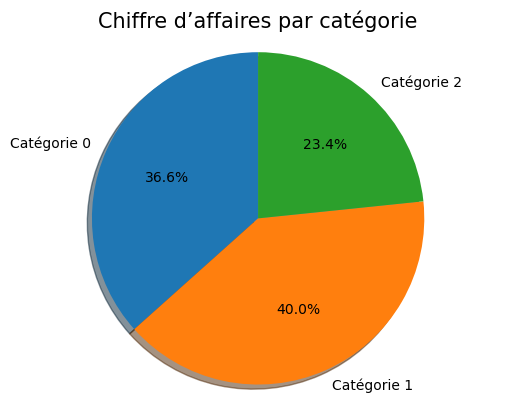

In [63]:
# Visualisation de la répartirion du CA par catégorie
name = ['Catégorie 0', 'Catégorie 1','Catégorie 2']
data = [CA_categ.at[0, 'CA'] , CA_categ.at[1, 'CA'] , CA_categ.at[2, 'CA']]

explode=(0, 0,0)
plt.pie(data, explode=explode , labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('Chiffre d’affaires par catégorie',fontsize=15)

plt.savefig('CA_categ.png')
plt.show()

La catégorie 1 est la catégorie la plus importante en terme de chiffre d'affaires généré avec 40% du CA, suivie de très prêt par la catégorie 0 (36.6% du CA), puis par la catégorie 2 (23.4 %).

#### 2.1.5 Chiffre d’affaires par sexe <a class="anchor" id="section_2_1_5"></a>

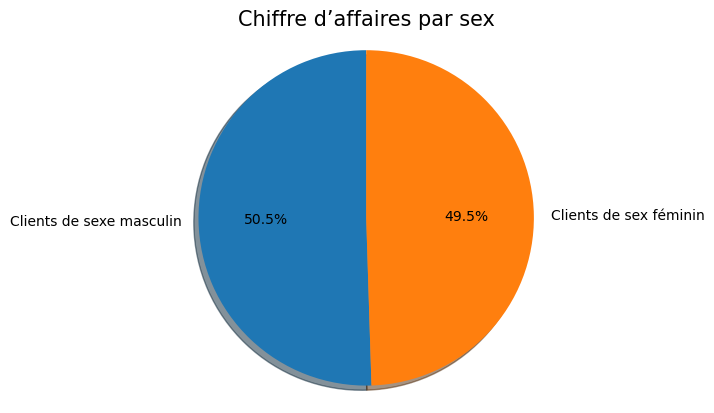

In [64]:
# Visualisation de la répartition du CA total par sex
CA_f = transactions[transactions['sex']=='f'][['price']].sum()
CA_m = transactions[transactions['sex']=='m'][['price']].sum()

name = ['Clients de sexe masculin','Clients de sex féminin']
data = [CA_m['price'], CA_f['price']]

explode=(0, 0)
plt.pie(data, explode=explode , labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('Chiffre d’affaires par sex',fontsize=15)

plt.savefig('CA_sex.png')
plt.show()

Les CA sont équitablement réparties entre les femmes avec  49,5% du CA total et les hommes avec 50,5% du CA total.

##### Distribution des CA par sex

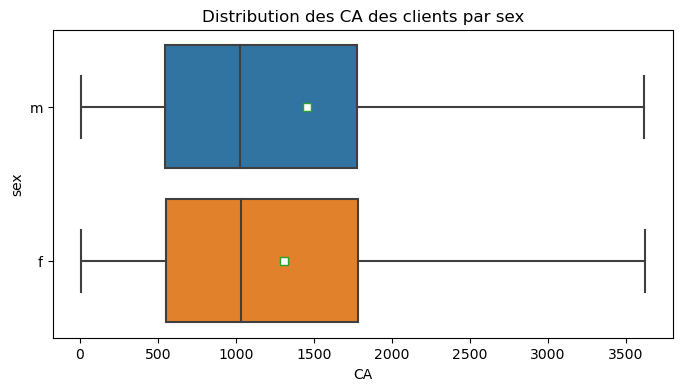

In [65]:
# Visiualisation de la distributuin des CA des clients par sex
plt.figure(figsize=(8, 4))
sns.boxplot(data=CA_client, y='sex', x='CA', showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des CA des clients par sex')
plt.savefig('box_CA_sex.png')
plt.show()

Les distributions des CA par sexe masculin et féminin sont similaires.

Nous allons vérifier cela avec un test statistique.

#### Test de Shapiro-Wilk pour vérifier la normalité

Le test de Shapiro-Wilk est un test de normalité qui permet de vérifier si un échantillon suit une distribution normale.

Hypothèse nulle H0 : l'échantillon suit une loi normale.

Plus la statistique de test est proche de 1, plus les données sont susceptibles de provenir d'une distribution normale. Si la statistique de test est proche de 0, cela indique que les données sont très différentes d'une distribution normale.

In [66]:
# Vérifier la normalité des deux groupes
CA_male = CA_client[CA_client['sex'] == 'm']['CA']
CA_female = CA_client[CA_client['sex'] == 'f']['CA']
stat1, p1 = shapiro(CA_male)
stat2, p2 = shapiro(CA_female)

# Afficher les résultats du test de normalité
print("Test de Shapiro-Wilk - Groupe 1 : stat = %g  p = %g" % (stat1, p1))
print("Test de Shapiro-Wilk - Groupe 2 : stat = %g  p = %g" % (stat2, p2))

Test de Shapiro-Wilk - Groupe 1 : stat = 0.0474495  p = 0
Test de Shapiro-Wilk - Groupe 2 : stat = 0.175282  p = 0


Les statistiques de test et les p-values suggèrent que l'hypothèse nulle de normalité peut être rejetée à un niveau de signification de 0,05: les CA hommes et femmes ne suivent pas une distribution normale.

Il existe des tests non paramétriques qui peuvent être utilisés lorsque les données ne suivent pas une distribution normale, comme le test de Mann-Whitney Wilcoxon.

#### Test de Mann-Whitney Wilcoxon

Nous souhaitons comparer les CA des clients en fonction de leur sexe, c'est-à-dire si les distributions de CA sont similaires ou différentes entre les clients masculins et féminins.

L'hypothèse nulle (H0) est qu'il n'y a pas de différence significative entre les groupes.

In [67]:
# Séparer les CA par genre
CA_male = CA_client[CA_client['sex'] == 'm']['CA']
CA_female = CA_client[CA_client['sex'] == 'f']['CA']

# Effectuer le test de Mann-Whitney Wilcoxon
stat, p = mannwhitneyu(CA_male, CA_female)

# Afficher les résultats
print("Statistique du test : {}".format(stat))
print("P-value du test : {}".format(p))

Statistique du test : 9231708.0
P-value du test : 0.9810779570676399


La p-value étant supérieure au seuil de 0,05 , cela indique qu'il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle.

On peut ainsi confirmer l'observation préalablement faite qu'il n'y a pas de différence significative entre les distributions de CA entre les clients masculins et féminins.

#### 2.1.6 Chiffre d’affaires par âge <a class="anchor" id="section_2_1_6"></a>

In [68]:
#Calcul de l'Âge du client
year = datetime.now().year # Année en cours
transactions['age'] = year - transactions['birth'] 

# Ajouter une colonne "tranche_age" en fonction de la colonne "age" au df transactions
def get_age_range(age):
    if age < 18:
        return "Moins de 18 ans"
    elif age < 25:
        return "18-24 ans"
    elif age < 35:
        return "25-34 ans"
    elif age < 50:
        return "35-49 ans"
    elif age < 65:
        return "50-64 ans"
    else:
        return "65 ans et plus"
    
transactions['tranche_age'] = transactions['age'].apply(get_age_range)

In [69]:
transactions

,index,id_prod,date,session_id,client_id,price,categ,sex,birth,mois,age,tranche_age
0,293395,0_1474,2021-03-10 20:26:59.587500,s_4544,c_1413,9.88,0.0,m,1980,2021-03,43,35-49 ans
1,580016,1_282,2021-03-07 19:36:34.652194,s_3135,c_8587,23.20,1.0,m,1955,2021-03,68,65 ans et plus
2,198550,0_1393,2021-03-06 16:52:57.445391,s_2650,c_3279,11.99,0.0,f,1975,2021-03,48,35-49 ans
3,425423,0_1606,2021-03-05 04:44:21.906223,s_1936,c_8392,17.40,0.0,f,1978,2021-03,45,35-49 ans
4,546190,1_683,2021-03-30 21:47:35.179342,s_13705,c_3454,13.99,1.0,m,1969,2021-03,54,50-64 ans
...,...,...,...,...,...,...,...,...,...,...,...,...
686695,257345,0_1227,2022-10-29 10:09:40.717968,s_289647,c_1609,4.99,0.0,m,1980,2021-10,43,35-49 ans
686696,193510,0_1566,2022-10-12 20:00:15.204683,s_281539,c_6249,9.04,0.0,f,1980,2021-10,43,35-49 ans
686697,523929,1_433,2022-10-01 18:27:46.250139,s_276321,c_1229,18.99,1.0,f,1974,2021-10,49,35-49 ans
686698,253131,1_572,2022-10-22 21:44:34.245688,s_286515,c_2613,19.95,1.0,m,1975,2021-10,48,35-49 ans


##### Répartition du CA par tranches d'âge

In [70]:
# Agréger les prix par tranche d'âge
CA_par_tranche_age = transactions.groupby('tranche_age')['price'].sum().reset_index()
# Renommer colonne 'price' en CA
CA_par_tranche_age = CA_par_tranche_age.rename(columns={'price': 'CA'})
CA_par_tranche_age

,tranche_age,CA
0,18-24 ans,1832422.49
1,25-34 ans,2198194.42
2,35-49 ans,4473391.29
3,50-64 ans,2366743.90
4,65 ans et plus,1172333.37


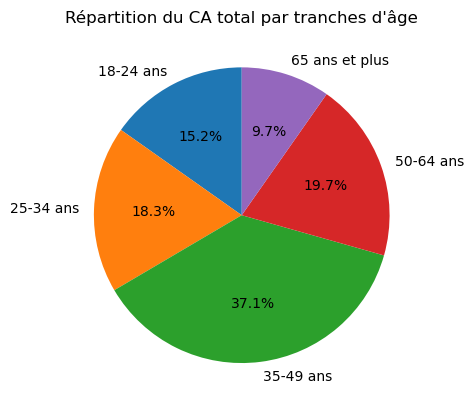

In [71]:
# Visualisation de la répartition du CA par tranches d'âge
tranche_ages = CA_par_tranche_age['tranche_age']
CA_age = CA_par_tranche_age['CA']

fig, ax = plt.subplots()
ax.pie(CA_age, labels=tranche_ages, autopct='%1.1f%%', startangle=90)
ax.set_title("Répartition du CA total par tranches d'âge")

plt.savefig('CA_tranche_age.png')
plt.show()

La tranche d'âge la plus rentable pour l'entreprise est celle des 35-49 ans, qui génère 37.1 % du CA total. 

Les tranches d'âge des 50-64 ans et des 25-34 ans génèrent également un chiffre d'affaires important pour l'entreprise, respectivement de 19.7% et 18.3% du CA  total.

La tranche d'âge des 65 ans et plus génèrent un chiffre d'affaires moins important, 9.7% du CA. 

#### Tests de normalité (Shapiro-Wilk) et d'homoscédasticité (Levene) pour chaque tranche d'âge

In [72]:
from scipy.stats import shapiro, levene

def test_anova_conditions(data, category_column, category_value, numeric_column):
    """
    Effectue des tests de normalité et d'homoscédasticité pour un groupe spécifié.

    Args:
        data (DataFrame): Le jeu de données.
        category_column (str): Le nom de la colonne contenant les catégories.
        category_value (str): La valeur de la catégorie à tester.
        numeric_column (str): Le nom de la colonne numérique à tester.

    Returns:
        dict: Un dictionnaire contenant les résultats des tests.
    """
    # Filtrer les données pour la catégorie spécifiée
    groupe_categorie = data[data[category_column] == category_value][numeric_column]
    
    # Test de normalité
    stat_normalite, p_value_normalite = shapiro(groupe_categorie)
    
    # Test d'homoscédasticité
    stat_homoscedasticite, p_value_homoscedasticite = levene(groupe_categorie, data[numeric_column])
    
    # Récapitulatif des résultats
    results = {
        'Catégorie': category_value,
        'Normalité (p-value)': p_value_normalite,
        'Homoscédasticité (p-value)': p_value_homoscedasticite
    }
    
    return results


In [73]:
data = transactions
categories = data['tranche_age'].unique()

# Initialiser un tableau pour récapituler les résultats
summary_table = []

# Effectuer les tests pour chaque catégorie
for category_value in categories:
    results = test_anova_conditions(data, category_column='tranche_age', category_value=category_value, numeric_column='price')
    summary_table.append(results)

# Créer un DataFrame à partir du tableau récapitulatif
summary_df = pd.DataFrame(summary_table)

# Afficher le récapitulatif des résultats
print(summary_df)

C:\Users\aicha\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


        Catégorie  Normalité (p-value)  Homoscédasticité (p-value)
0       35-49 ans                  0.0                0.000000e+00
1  65 ans et plus                  0.0               1.885012e-265
2       50-64 ans                  0.0                0.000000e+00
3       25-34 ans                  0.0                0.000000e+00
4       18-24 ans                  0.0                0.000000e+00


In [74]:
from scipy.stats import shapiro, levene
import pandas as pd

def test_anova_conditions(data, age_group):
    # Filtrer les données pour le groupe d'âge spécifié
    groupe_age = data[data['tranche_age'] == age_group]['price']
    
    # Test de normalité
    stat_normalite, p_value_normalite = shapiro(groupe_age)
    
    # Test d'homoscédasticité
    stat_homoscedasticite, p_value_homoscedasticite = levene(groupe_age, data['price'])
    
    # Récapitulatif des résultats
    results = {
        'Tranche d\'âge': age_group,
        'Normalité (p-value)': p_value_normalite,
        'Homoscédasticité (p-value)': p_value_homoscedasticite
    }
    
    return results

# utilisation
data = transactions
tranches_age = data['tranche_age'].unique()

# Initialiser un tableau pour récapituler les résultats
summary_table = []

# Effectuer les tests pour chaque tranche d'âge
for age_group in tranches_age:
    results = test_anova_conditions(data, age_group)
    summary_table.append(results)

# Créer un DataFrame à partir du tableau récapitulatif
summary_df = pd.DataFrame(summary_table)

# Afficher le récapitulatif des résultats
print(summary_df)


C:\Users\aicha\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


    Tranche d'âge  Normalité (p-value)  Homoscédasticité (p-value)
0       35-49 ans                  0.0                0.000000e+00
1  65 ans et plus                  0.0               1.885012e-265
2       50-64 ans                  0.0                0.000000e+00
3       25-34 ans                  0.0                0.000000e+00
4       18-24 ans                  0.0                0.000000e+00


Les résultats montrent que pour chaque tranche d'âge, les p-valeurs pour les tests de normalité et d'homoscédasticité sont <0.05. Cela suggère que les données ne suivent pas une distribution normale et que les variances ne sont pas égales entre les groupes.

Étant donné que les conditions d'application de l'ANOVA ne sont pas remplies dans ce cas, il peut être nécessaire de considérer des méthodes alternatives pour l'analyse. 

In [77]:
import scipy.stats as stats
import pandas as pd

# Assuming `tranches_age` and `data` are defined earlier in your code

# Initialize a list to summarize the Kruskal-Wallis test results
kw_results = []

# Perform the tests for each age group
for age_group in tranches_age:
    groupe_age = data[data['tranche_age'] == age_group]['price']
    stat_kw, p_value_kw = stats.kruskal(groupe_age, data['price'])  # Added 'stats.' here
    
    results = {
        'Tranche d\'âge': age_group,
        'Kruskal-Wallis (p-value)': p_value_kw
    }
    
    kw_results.append(results)

# Create a DataFrame from the summary list
kw_results_df = pd.DataFrame(kw_results)

# Display the results table
print(kw_results_df)

    Tranche d'âge  Kruskal-Wallis (p-value)
0       35-49 ans              0.000000e+00
1  65 ans et plus              0.000000e+00
2       50-64 ans             1.061479e-185
3       25-34 ans              0.000000e+00
4       18-24 ans              0.000000e+00


Les valeurs de p sont <0.05. Cela suggère qu'il existe des différences significatives dans les CA entre les différentes tranches d'âge.

#### Distribution des CA par âge

Regardons maintenant le comportement par âge de nos clients.

In [78]:
# Agréger les prix par âge pour avoir le CA par âge
CA_par_age = transactions.groupby(by=['age'], as_index=False).agg({'price': 'sum', 'tranche_age': 'first'})
# Renommer colonne 'price' en CA
CA_par_age = CA_par_age.rename(columns={'price': 'CA'})
CA_par_age

,age,CA,tranche_age
0,19,616240.18,18-24 ans
1,20,180911.50,18-24 ans
2,21,185755.68,18-24 ans
3,22,183361.73,18-24 ans
4,23,166955.23,18-24 ans
...,...,...,...
71,90,5285.53,65 ans et plus
72,91,4938.71,65 ans et plus
73,92,2723.17,65 ans et plus
74,93,4130.12,65 ans et plus


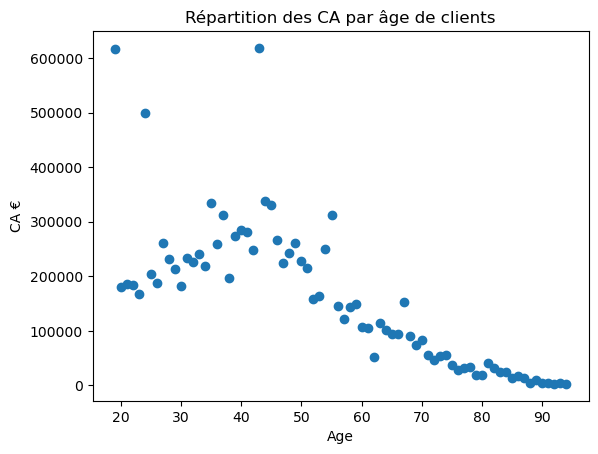

In [79]:
# Visualisation de la répartition des CA par âge de clients
x = CA_par_age['age']
y = CA_par_age['CA']

plt.scatter(x,y)

plt.title("Répartition des CA par âge de clients")
plt.xlabel('Age')
plt.ylabel('CA €')

plt.savefig('repartition_CA_age.png')
plt.show()

Il semble que plus l'âge augmente moins le CA est élevé. Nous allons vérifier cette analyse avec un test statistique.

### Corrélation entre deux variables quantitatives: âge du client et CA

#### Test de Shapiro-Wilk pour vérifier la normalité

Hypothèse nulle H0 : la distribution des CA suit une loi normale.

In [80]:
stat, p = shapiro(y)

# afficher le résultat du test
print('Statistique du test de Shapiro-Wilk :', stat)
print('p-valeur :', p)

Statistique du test de Shapiro-Wilk : 0.888715386390686
p-valeur : 6.796304205636261e-06


La p-valeur est très faible , ce qui indique que la distribution des CA ne suit pas une distribution normale. 

Il existe des tests non paramétriques qui peuvent être utilisés lorsque les données ne suivent pas une distribution normale, comme le test de Spearman.

#### Test de corrélation de Spearman 

Ho: il n'y a pas de corrélation entre les deux variables quantitatives âge du client et CA.

In [81]:
corr, p_value = spearmanr(x, y)
print("Corrélation de Spearman :", corr)
print("p-valeur :", p_value)

Corrélation de Spearman : -0.8566780587833219
p-valeur : 5.725513859577553e-23


La p-value est inférieure à 0.05, que l'on peut rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation entre les deux variables.

Dans ce cas, la corrélation de Spearman est de -0,86, ce qui suggère une forte corrélation négative entre l'âge et le chiffre d'affaires. Cela signifie que plus l'âge augmente, moins élevé est le  CA généré.

### 2.2 Analyses du nombre de transactions <a class="anchor" id="section_2_2"></a>

Nombre de Clients Actifs : Le nombre total de clients qui ont effectué au moins une transaction au cours de la période étudiée. Cela donne une indication de la taille de la base de clients.

Taux de Rétention Client : Le pourcentage de clients qui reviennent pour effectuer des achats répétés. Cela mesure la fidélité à la marque et la satisfaction client.

#### 2.2.1 Nombre de transactions par tranche d'âge et catégorie <a class="anchor" id="section_2_2_1"></a>

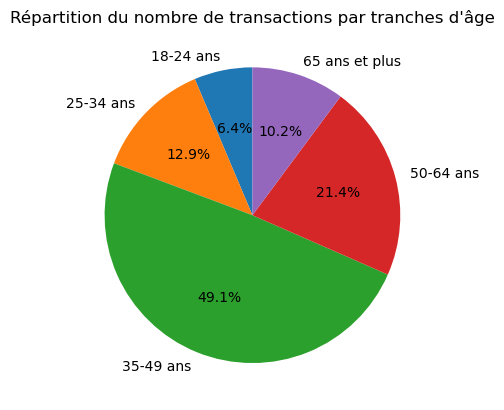

In [82]:
# Visualisation de la répartition du nombre de transactions par tranches d'âge
table_transactions_tranche_age =transactions.groupby(['tranche_age']).size().reset_index(name='count')
tranche_ages = table_transactions_tranche_age['tranche_age']
nombre_transactions = table_transactions_tranche_age['count']

fig, ax = plt.subplots()
ax.pie(nombre_transactions, labels=tranche_ages, autopct='%1.1f%%', startangle=90)
ax.set_title("Répartition du nombre de transactions par tranches d'âge")

plt.savefig('nombre_transactions_tranche_age.png')
plt.show()


La tranche d'âge qui achète le plus est celle des 35-49 ans avec 49.1%.

Les tranches d'âge des 50-64 ans et des 25-34 ans suivent avec respectivement de 21.4% et 12.9%.

La tranche d'âge des 18-24 ans sont ceux qui achètent le moins.

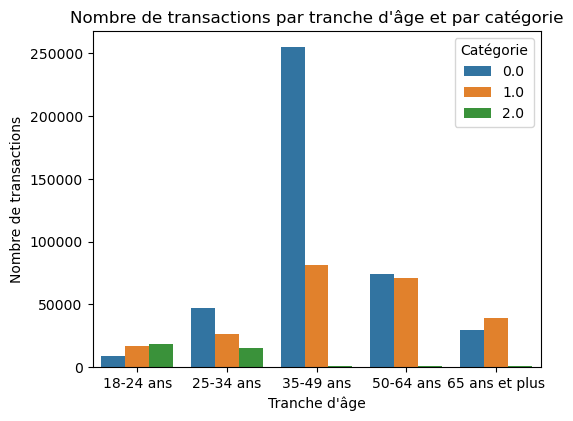

In [83]:
# Nombre de transactions par tranche d'âge et par catégorie

# Création d'un tableau de données avec le nombre de transactions par tranche d'âge et par catégorie
table = transactions.groupby(['tranche_age', 'categ']).size().reset_index(name='count')

# Création du diagramme en barres
sns.barplot(data=table, x='tranche_age', y='count', hue='categ')

# Personnalisation de l'affichage
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions par tranche d\'âge et par catégorie')
plt.legend(title='Catégorie')
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
plt.savefig('barre_transactions_tranche_age_categ.png')
plt.show()

La catégorie 0 est surtout consommée par les 35-49 ans suivi par les 50-64ans.

La catégorie 1 est surtout achetés par les 35-49 ans suivi de près par les 50-64ans.

La catégorie 2, qui est la catégorie la plus chère, est presque exclusivement achetée par les moins de 34 ans.

### Test Chi-2 (χ²); Catégorie et tranche d'âge

Le test d'indépendance du χ² mesure la corrélation entre 2 variables qualitatives.

Le test d'indépendance du χ² est sensible aux effectifs de chaque catégorie et qu'il est donc important de s'assurer que chaque catégorie a un nombre suffisant d'observations (au moins 5) pour que le test soit fiable.

L'hypothèse nulle (H0) est que les variables sont indépendantes, c'est-à-dire qu'il n'y a pas de relation significative entre les variables.

In [84]:
# Tableau de contingence
X = "tranche_age"
Y = "categ"

cont1 = transactions[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont1

categ,0.0,1.0,2.0,Total
tranche_age,,,,
18-24 ans,8578,16654,18528,43760
25-34 ans,46998,26438,15258,88694
35-49 ans,254941,81342,1131,337414
50-64 ans,74340,71367,1340,147047
65 ans et plus,29728,39428,629,69785
Total,414585,235229,36886,686700


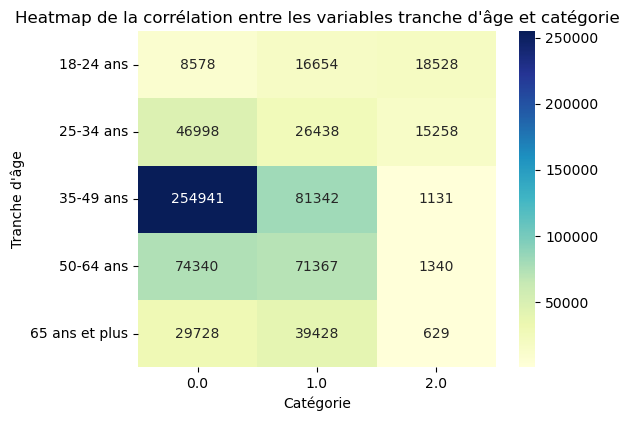

Statistique du test : 219833.66260304948
P-value du test : 0.0


In [85]:
# Extraire le tableau de contingence sans la ligne et colonne "Total"
cont1_table = cont1.iloc[:-1, :-1]

# Créer une heatmap à partir du tableau de contingence
sns.heatmap(cont1_table, cmap="YlGnBu", annot=True, fmt=".0f")

# Afficher la heatmap
plt.title("Heatmap de la corrélation entre les variables tranche d'âge et catégorie")
plt.xlabel('Catégorie')
plt.ylabel('Tranche d\'âge')
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
plt.savefig('heatmap_age_categ.png')
plt.show()

# Afficher les résultats du test
chi2, p, dof, expected = chi2_contingency(cont1_table)
print(f"Statistique du test : {chi2}")
print(f"P-value du test : {p}")

La p-value très faible (<0.05) suggère qu'il y a une forte association entre les variables "categ" et "tranche d'âge".

#### 2.2.2 Nombre de transactions par sex et catégorie <a class="anchor" id="section_2_2_2"></a>

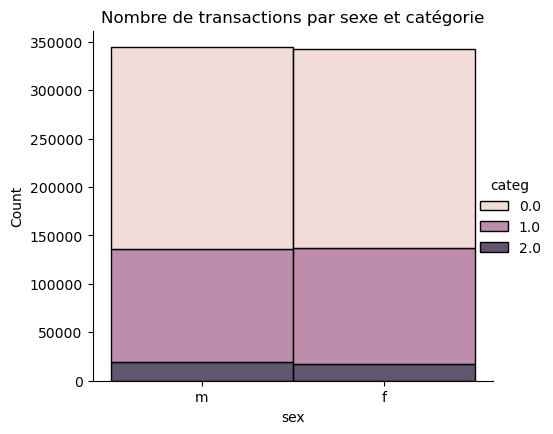

In [86]:
# Visualisation du Nombre de transactions par sexe et catégorie
sns.displot(data=transactions, x='sex', hue='categ', multiple='stack', stat='count')
plt.title('Nombre de transactions par sexe et catégorie')
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
plt.savefig('transactions_sex_categ.png')
plt.show()

Les hommes et les femmes ont le même comportement d'achat par catégorie indépendemment du sex.

### Test Chi-2 (χ²); Catégorie et sexe

L'hypothèse nulle (H0) est que les variables sont indépendantes, c'est-à-dire qu'il n'y a pas de relation significative entre les variables.

In [87]:
# Tableau de contingence
X = "sex"
Y = "categ"

cont2 = transactions[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont2

categ,0.0,1.0,2.0,Total
sex,,,,
f,205876,119087,17481,342444
m,208709,116142,19405,344256
Total,414585,235229,36886,686700


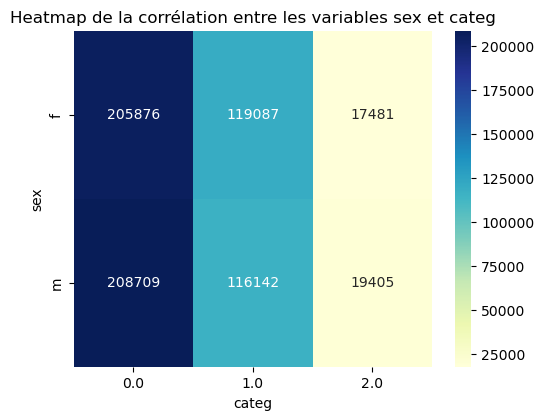

Statistique du test : 151.80633945618422
P-value du test : 1.0856059829457648e-33


In [88]:
# Extraire le tableau de contingence sans la ligne et colonne "Total"
cont2_table = cont2.iloc[:-1, :-1]

# Créer une heatmap à partir du tableau de contingence
sns.heatmap(cont2_table, cmap="YlGnBu", annot=True, fmt=".0f")

# Afficher la heatmap
plt.title("Heatmap de la corrélation entre les variables sex et categ")
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
plt.savefig('heatmap_sex_categ.png')
plt.show()

# Afficher les résultats du test
chi2, p, dof, expected = chi2_contingency(cont2_table)
print(f"Statistique du test : {chi2}")
print(f"P-value du test : {p}")

La p-value est très faible (<0.05), ce qui suggère que les variables ne sont pas indépendantes, qu'il y a une relation significative entre les variables sexe et categ.

La Heatmap nous montre que le comportement d'achat entre hommes et femmes est le même. Il est possible que le test ait détecté une légère différence qui est visuellement non significative.

On décide de ne pas prendre en compte les résultats de ce test par rapport aux conclusions que l'on souhaite tirer, l'absence de relation entre catégories et sexe.

### 2.3 Etude du panier moyen et de la fréquence d'achats<a class="anchor" id="section_2_3"></a>

#### 2.3.1 Panier moyen et Fréquence d'achats  <a class="anchor" id="section_2_3_1"></a> 

In [89]:
# Agréger les prix par session pour avoir le montant par session
session_panier = transactions.groupby(by=['session_id'], as_index=False).agg({'price': 'sum', 'client_id': 'first','sex': 'first','age': 'first','tranche_age':'first','date': 'first','mois': 'first'})
session_panier['nb_articles'] = transactions.groupby(by=['session_id'])['id_prod'].count().values
# Renommer colonne 'price' en montant
session_panier = session_panier.rename(columns={'price': 'montant_total'})
session_panier.sort_values(by = 'montant_total', ascending = False)

,session_id,montant_total,client_id,sex,age,tranche_age,date,mois,nb_articles
194661,s_288624,888.40,c_6761,f,26,25-34 ans,2022-10-27 06:19:29.645205,2022-10,6
183258,s_278186,707.80,c_5252,f,20,18-24 ans,2022-10-05 16:52:27.604316,2022-10,6
191795,s_286013,707.64,c_3442,m,24,18-24 ans,2022-10-21 22:40:45.924626,2022-10,6
196004,s_289850,675.18,c_547,f,22,18-24 ans,2022-10-29 21:06:23.254948,2022-10,6
185531,s_280262,647.12,c_4090,m,24,18-24 ans,2022-10-10 02:03:34.560236,2022-10,8
...,...,...,...,...,...,...,...,...,...
149037,s_246917,0.66,c_5969,m,58,50-64 ans,2022-08-01 16:04:18.964261,2022-08,1
314419,s_83637,0.66,c_5969,m,58,50-64 ans,2021-09-01 16:04:18.964261,2021-09,1
267437,s_41352,0.62,c_3757,f,64,50-64 ans,2021-05-29 20:46:36.259964,2021-05,1
255946,s_34456,0.62,c_5510,f,82,65 ans et plus,2021-05-14 15:26:20.597059,2021-05,1


In [90]:
# Agréger par clients et faire la moyenne des montants par session, la somme totale et la moyenne par panier des articles acgetés par client
panier_moyen = session_panier.groupby(by=['client_id'], as_index=False).agg({'montant_total': 'mean','nb_articles': ['sum', 'mean'],'sex': 'first','age': 'first','tranche_age':'first'})

# Renommer les colonnes
panier_moyen.columns = ['client_id', 'prix_panier_moyen', 'nb_articles_total', 'taille_panier_moyen', 'sex', 'age', 'tranche_age']

#Calcul de la fréquence d'achats mensuelle: Nombre de livres par mois
panier_moyen['nb_articles_mois'] = round(panier_moyen['nb_articles_total'] / 12)
panier_moyen.sort_values(by = 'nb_articles_total', ascending = False)

,client_id,prix_panier_moyen,nb_articles_total,taille_panier_moyen,sex,age,tranche_age,nb_articles_mois
677,c_1609,30.925331,25511,2.420858,m,43,35-49 ans,2126.0
6336,c_6714,62.268578,9295,3.701712,f,55,50-64 ans,775.0
2723,c_3454,21.428688,6927,1.272410,m,54,50-64 ans,577.0
4387,c_4958,78.439697,5317,1.412593,m,24,18-24 ans,443.0
2513,c_3263,39.168551,411,2.978261,f,38,35-49 ans,34.0
...,...,...,...,...,...,...,...,...
920,c_1828,68.990000,1,1.000000,m,19,18-24 ans,0.0
3575,c_4223,24.810000,1,1.000000,f,72,65 ans et plus,0.0
4043,c_4648,11.200000,1,1.000000,m,19,18-24 ans,0.0
5867,c_6292,24.240000,1,1.000000,m,31,25-34 ans,0.0


Nous observons que les 4 gros clients préalablement repérés { c_1609, c_4958, c_6714,c_3454 } ont les fréquences d'achat les plus importantes.

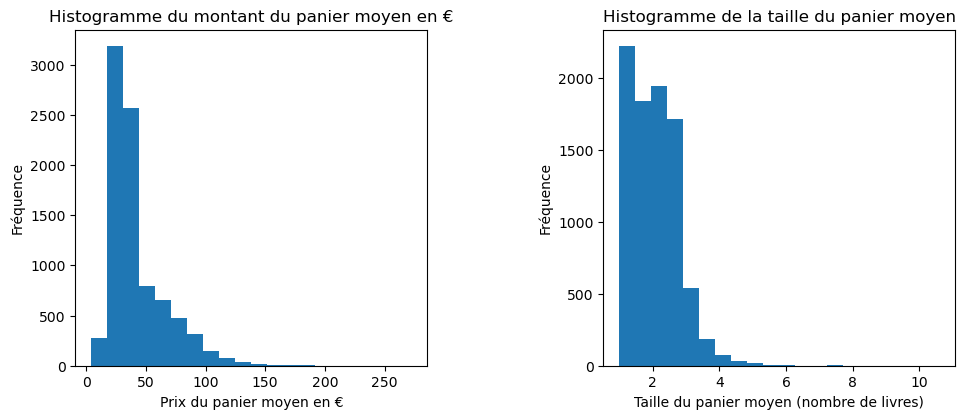

In [91]:
#Histogrammes du montant moyen du panier moyen et de la taille du panier moyen

plt.subplot(1, 2, 1)

# extraire la colonne des prix moyens du panier moyen
panier = panier_moyen['prix_panier_moyen']
# créer l'histogramme
plt.hist(panier, bins=20)
# ajouter les labels et le titre
plt.xlabel('Prix du panier moyen en €')
plt.ylabel('Fréquence')
plt.title('Histogramme du montant du panier moyen en €')
plt.savefig('histogramme_panier_moy.png')


plt.subplot(1, 2, 2)

# extraire la colonne des tailles du panier moyen
taille_moy = panier_moyen['taille_panier_moyen']
# créer l'histogramme
plt.hist(taille_moy, bins=20)
# ajouter les labels et le titre
plt.xlabel('Taille du panier moyen (nombre de livres)')
plt.ylabel('Fréquence')
plt.title('Histogramme de la taille du panier moyen')
plt.savefig('histogramme_taille_panier_moy.png')

# space between the plots
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.5, hspace = 0)

plt.show()

Le panier moyen est plus fréquemment situé approximativement entre 30 et 40€ et est composé en moyenne de 1 à 3 livres.

#### 2.3.2 Relation entre âge des clients et le montant du panier moyen  <a class="anchor" id="section_2_3_2"></a> 

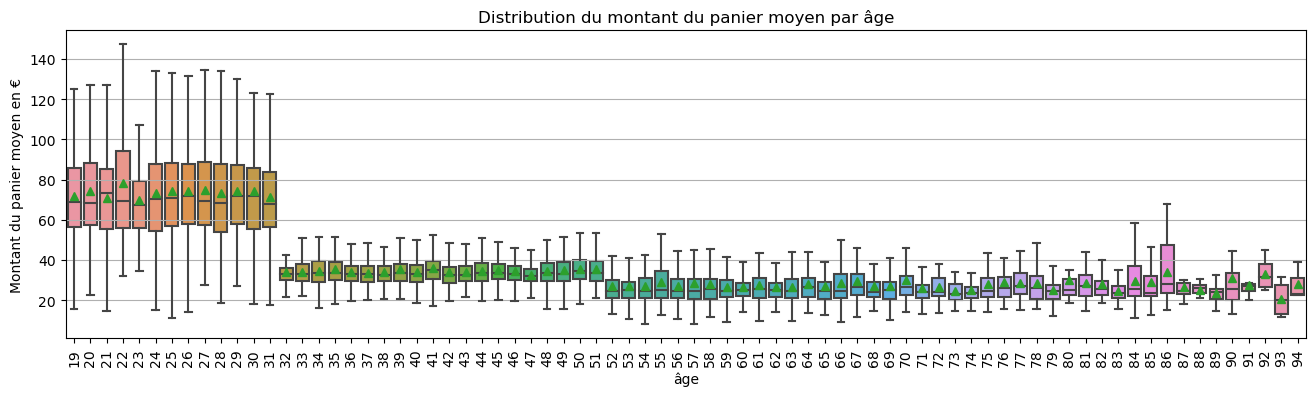

In [92]:
# Visualisation de la distribution du montant du panier moyen par âge
plt.figure(figsize=(16,4))
sns.boxplot(
    data=panier_moyen,
    y='prix_panier_moyen', x='age', showfliers=False, showmeans=True)
plt.xticks(rotation=90)
plt.ylabel('Montant du panier moyen en €')
plt.xlabel('âge')
plt.grid(axis='y')

plt.title('Distribution du montant du panier moyen par âge')
plt.savefig('boxplot_montant_panier_age.png')
plt.show()

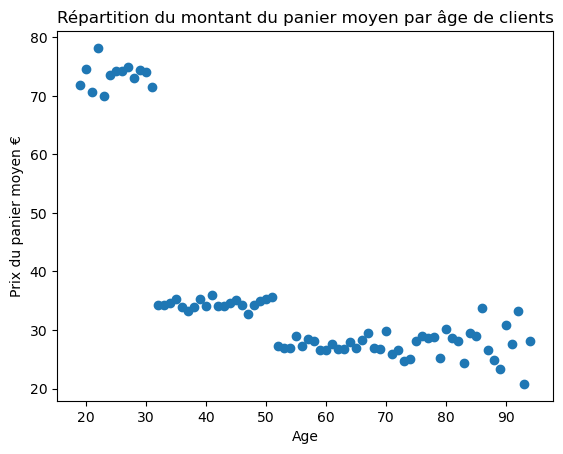

In [93]:
# Visualisation de la répartition de la moyenne du montant du panier moyen par âge de clients
panier_moyen_age = panier_moyen.groupby(by=['age'], as_index=False).agg({'prix_panier_moyen': 'mean'})
x = panier_moyen_age['age']
y = panier_moyen_age['prix_panier_moyen']

plt.scatter(x,y)

plt.title("Répartition du montant du panier moyen par âge de clients")
plt.xlabel('Age')
plt.ylabel('Prix du panier moyen €')

plt.savefig('panier_moy_age.png')
plt.show()

Nous observons que plus l'âge du client augmente plus le montant du panier moyen diminue.

Nous allons tenter de vérifier cette corrélation à l'aide de tests statiqtiques.

#### Test de Shapiro-Wilk pour vérifier la normalité

Hypothèse nulle H0 : la distribution du montant du panier moyen suit une loi normale.

In [120]:
# Tester la normalité de la distribution du montant du panier moyen
stat, p = shapiro(y)

# afficher le résultat du test
print('Statistique du test de Shapiro-Wilk :', stat)
print('p-valeur :', p)

Statistique du test de Shapiro-Wilk : 0.6519696712493896
p-valeur : 3.920490234537999e-12


La p-valeur est très faible , ce qui indique que la distribution des prix ne suit pas une distribution normale.

Dans ce cas, nous allons vérifier la corrélation avec un test de Sprearman.

#### Test de Spearman

Ho: il n'y a pas de corrélation entre les deux variables.

In [121]:
# Test de corrélation de Spearman
corr, p_value = spearmanr(x, y)
print("Corrélation de Spearman :", corr)
print("p-valeur :", p_value)

Corrélation de Spearman : -0.7707177033492822
p-valeur : 3.893787769630182e-16


La p-value est inférieure à 0.05, ce qui indique que la corrélation observée est significative et que l'on peut rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation entre les deux variables.

La corrélation de Spearman est de -0,77, ce qui suggère une forte corrélation négative entre l'âge et le panier moyen. Cela signifie que plus l'âge augmente, moins élevé est le montant du panier moyen.

Visuellement, nous observons une relation non linéaire entre l'âge et le montant moyen du panier. Nous avons identifié trois groupes d'âge qui se distinguent en fonction du prix du panier moyen:
- Moins de 32 ans : Cette tranche comprend les individus qui ont des panier moyens de plus de 70€.
- Entre 32 et 51 ans inclusivement : Cette tranche comprend les individus qui ont un prix de panier moyen compris entre 30€ et 40€.
- Plus de 51 ans : Cette tranche comprend les individus qui ont des panier moyens inférieur à 30€.

Nous allons découper les âges en tranches et effectuer des tests tels que l'ANOVA ou le test de Kruskal-Wallis pour étudier les différences entre ces groupes d'âge.

In [104]:
# Diviser les âges en tranches spécifiques
def categoriser_age(age):
    if age < 32:
        return '< 32'
    elif age <= 51:
        return '32 <= age <= 51'
    else:
        return '> 51'

panier_moyen_age['tranche_age'] = panier_moyen_age['age'].apply(categoriser_age)
panier_moyen_age

,age,prix_panier_moyen,tranche_age
0,19,71.947570,< 32
1,20,74.549944,< 32
2,21,70.600630,< 32
3,22,78.200867,< 32
4,23,70.007890,< 32
...,...,...,...
71,90,30.918141,> 51
72,91,27.658370,> 51
73,92,33.244272,> 51
74,93,20.783075,> 51


#### Comparaison des Moyennes : ANOVA ou Test de Kruskal-Wallis selon les Conditions

In [105]:
def test_anova_conditions(data, age_group):
    # Filtrer les données pour le groupe d'âge spécifié
    groupe_age = panier_moyen_age[panier_moyen_age['tranche_age'] == age_group]['prix_panier_moyen']
    
    # Test de normalité
    stat_normalite, p_value_normalite = shapiro(groupe_age)
    
    # Test d'homoscédasticité
    stat_homoscedasticite, p_value_homoscedasticite = levene(groupe_age, data['prix_panier_moyen'])
    
    # Récapitulatif des résultats
    results = {
        'Tranche d\'âge': age_group,
        'Normalité (p-value)': p_value_normalite,
        'Homoscédasticité (p-value)': p_value_homoscedasticite
    }
    
    return results

# Exemple d'utilisation
tranches_age = panier_moyen_age['tranche_age'].unique()

# Initialiser un tableau pour récapituler les résultats
summary_table = []

# Effectuer les tespanier_moyen_agets pour chaque tranche d'âge
for age_group in tranches_age:
    results = test_anova_conditions(panier_moyen_age, age_group)
    summary_table.append(results)

# Créer un DataFrame à partir du tableau récapitulatif
summary_df = pd.DataFrame(summary_table)

# Afficher le récapitulatif des résultats
print(summary_df)

     Tranche d'âge  Normalité (p-value)  Homoscédasticité (p-value)
0             < 32             0.391674                    0.047518
1  32 <= age <= 51             0.804119                    0.006990
2             > 51             0.091755                    0.000465


Les trois groupes d'âge ont des valeurs de p supérieures à 0,05, suggérant que les données ne s'écartent pas significativement d'une distribution normale. 
Les variances entre les groupes ne sont pas égales, la p-value<0.05, l'homoscédasticité n'est pas respectée.

Etant donné que les conditions d'application de l'ANOVA ne sont pas remplies , nous allons considérer des méthodes alternatives. L'un des tests non paramétriques appropriés dans ce cas serait le test de Kruskal-Wallis.

In [106]:
# Initialize a list to summarize the Kruskal-Wallis test results
kw_results = []

# Perform the tests for each age group
for age_group in tranches_age:
    groupe_age = panier_moyen_age[panier_moyen_age['tranche_age'] == age_group]['prix_panier_moyen']  # Adjusted column name
    stat_kw, p_value_kw = stats.kruskal(groupe_age, panier_moyen_age['prix_panier_moyen'])  # Used adjusted column name and added 'stats.' before 'kruskal'
    
    results = {
        'Tranche d\'âge': age_group,
        'Kruskal-Wallis (p-value)': p_value_kw
    }
    
    kw_results.append(results)

# Create a DataFrame from the summary list
kw_results_df = pd.DataFrame(kw_results)

# Display the results table
print(kw_results_df)

     Tranche d'âge  Kruskal-Wallis (p-value)
0             < 32                  0.000002
1  32 <= age <= 51                  0.007371
2             > 51                  0.000093


Avec des p-value<0.05, ces résultats suggèrent que les prix moyens du panier varient significativement entre les différentes tranches d'âge.

#### 2.3.3 Relation entre âge des clients et la taille du panier moyen  <a class="anchor" id="section_2_3_3"></a> 

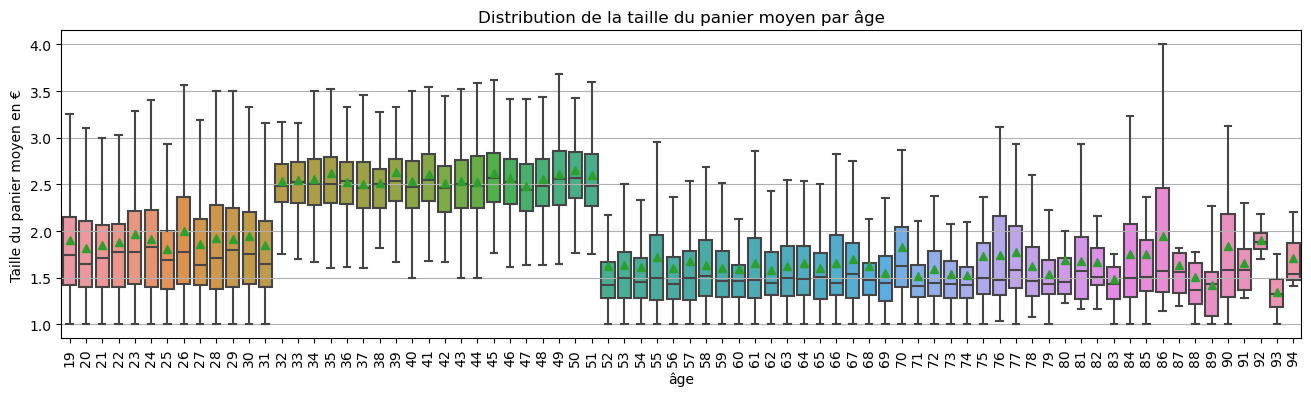

In [107]:
# Visualisation de la distribution du montant du panier moyen par âge
plt.figure(figsize=(16,4))
sns.boxplot(
    data=panier_moyen,
    y='taille_panier_moyen', x='age', showfliers=False, showmeans=True)
plt.xticks(rotation=90)
plt.ylabel('Taille du panier moyen en €')
plt.xlabel('âge')
plt.grid(axis='y')
plt.title('Distribution de la taille du panier moyen par âge')
plt.savefig('boxplot_taille_panier_age.png')
plt.show()

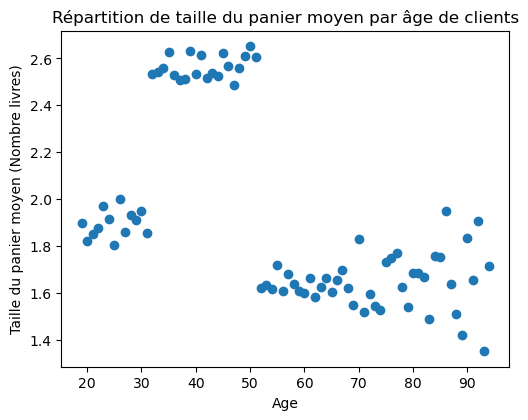

In [108]:
# Visualisation de la répartition de taille du panier moyen par âge de clients
taille_panier_moyen_age = panier_moyen.groupby(by=['age'], as_index=False).agg({'taille_panier_moyen': 'mean'})
x = taille_panier_moyen_age['age']
y = taille_panier_moyen_age['taille_panier_moyen']

plt.scatter(x,y)

plt.title("Répartition de taille du panier moyen par âge de clients")
plt.xlabel('Age')
plt.ylabel('Taille du panier moyen (Nombre livres)')
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
plt.savefig('nuage_taille_panier_age.png')

plt.show()

Nous avons identifié les mêmes groupes d'âge qui se distinguent aussi en fonction de la taille du panier moyen:
- Moins de 32 ans : Cette tranche comprend les individus qui comptent en moyenne un peu moins de 2 livres par panier.
- Entre 32 et 51 ans inclusivement : Cette tranche comprend les individus qui comptent en moyenne 2.5 livres par commande.
- Plus de 51 ans : Cette tranche comprend les individus qui achètent 1.5 à 2 livres en moyenne par commande.

Nous allons découper les âges en tranches et effectuer des tests tels que l'ANOVA ou le test de Kruskal-Wallis pour étudier les différences entre ces groupes d'âge.

In [109]:
panier_moyen['tranche_age'] = panier_moyen['age'].apply(categoriser_age)
panier_moyen

,client_id,prix_panier_moyen,nb_articles_total,taille_panier_moyen,sex,age,tranche_age,nb_articles_mois
0,c_1,17.911563,40,1.250000,m,68,> 51,3.0
1,c_10,43.918529,62,1.823529,m,67,> 51,5.0
2,c_100,50.970000,8,1.600000,m,31,< 32,1.0
3,c_1000,25.078352,126,1.384615,f,57,> 51,10.0
4,c_1001,39.092727,96,2.181818,m,41,32 <= age <= 51,8.0
...,...,...,...,...,...,...,...,...
8593,c_995,22.711111,15,1.666667,m,68,> 51,1.0
8594,c_996,21.403462,98,1.256410,f,53,> 51,8.0
8595,c_997,64.110000,59,2.565217,f,29,< 32,5.0
8596,c_998,125.776522,55,2.391304,m,22,< 32,5.0


#### Comparaison des Moyennes : ANOVA ou Test de Kruskal-Wallis selon les Conditions

In [119]:
def test_anova_conditions(data, age_group):
    # Filtrer les données pour le groupe d'âge spécifié
    groupe_age = panier_moyen[panier_moyen['tranche_age'] == age_group]['taille_panier_moyen']
    
    # Test de normalité
    stat_normalite, p_value_normalite = shapiro(groupe_age)
    
    # Test d'homoscédasticité
    stat_homoscedasticite, p_value_homoscedasticite = levene(groupe_age, data['taille_panier_moyen'])
    
    # Récapitulatif des résultats
    results = {
        'Tranche d\'âge': age_group,
        'Normalité (p-value)': p_value_normalite,
        'Homoscédasticité (p-value)': p_value_homoscedasticite
    }
    
    return results

# Exemple d'utilisation
tranches_age = panier_moyen['tranche_age'].unique()

# Initialiser un tableau pour récapituler les résultats
summary_table = []

# Effectuer les tespanier_moyen_agets pour chaque tranche d'âge
for age_group in tranches_age:
    results = test_anova_conditions(panier_moyen, age_group)
    summary_table.append(results)

# Créer un DataFrame à partir du tableau récapitulatif
summary_df = pd.DataFrame(summary_table)

# Afficher le récapitulatif des résultats
print(summary_df)

     Tranche d'âge  Normalité (p-value)  Homoscédasticité (p-value)
0             > 51         0.000000e+00               5.658197e-111
1             < 32         5.180600e-42                7.680408e-11
2  32 <= age <= 51         4.904545e-44               1.226471e-168


Ces p-values sont très faibles, ce qui suggère que les données ne suivent pas une distribution normale et que les variances ne sont pas homogènes entre les groupes.

Etant donné que les conditions d'application de l'ANOVA ne sont pas remplies , nous allons considérer des méthodes alternatives. L'un des tests non paramétriques appropriés dans ce cas serait le test de Kruskal-Wallis.

In [121]:
# Initialize a list to summarize the Kruskal-Wallis test results
kw_results = []

# Perform the tests for each age group
for age_group in tranches_age:
    groupe_age = panier_moyen[panier_moyen['tranche_age'] == age_group]['taille_panier_moyen']  # Adjusted column name
    stat_kw, p_value_kw = stats.kruskal(groupe_age, panier_moyen['taille_panier_moyen'])  # Used adjusted column name and added 'stats.' before 'kruskal'
    
    results = {
        'Tranche d\'âge': age_group,
        'Kruskal-Wallis (p-value)': p_value_kw
    }
    
    kw_results.append(results)

# Create a DataFrame from the summary list
kw_results_df = pd.DataFrame(kw_results)

# Display the results table
print(kw_results_df)

     Tranche d'âge  Kruskal-Wallis (p-value)
0             > 51             1.585289e-215
1             < 32              1.344111e-35
2  32 <= age <= 51              0.000000e+00


Avec des p-value<0.05, ces résultats suggèrent que les tailles moyens du panier varient significativement entre les différentes tranches d'âge.

#### 2.3.4 Relation entre âge des clients et la fréquence d’achat <a class="anchor" id="section_2_3_4"></a> 

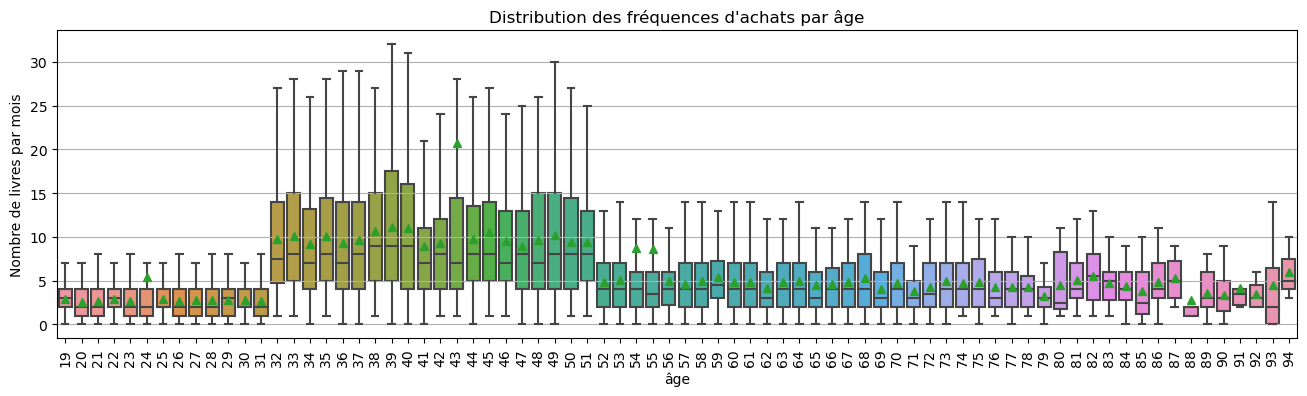

In [91]:
# Visualisation de la distribution des fréquences d'achat par âge
plt.figure(figsize=(16,4))
sns.boxplot(
    data=panier_moyen,
    y='nb_articles_mois', x='age', showfliers=False,showmeans=True)
plt.xticks(rotation=90)
plt.xlabel('âge')
plt.ylabel('Nombre de livres par mois')
plt.grid(axis='y')
plt.title('Distribution des fréquences d\'achats par âge')
plt.savefig('boxplot_freq_achats_age.png')
plt.show()

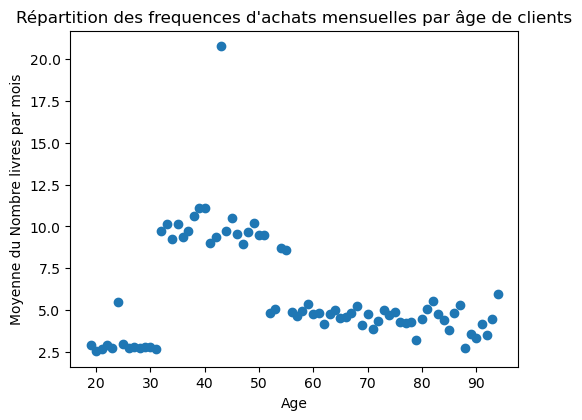

In [92]:
# Visualisation de la répartition des fréquences d'achats par âge de clients
panier_moyen_age = panier_moyen.groupby(by=['age'], as_index=False).agg({'nb_articles_mois': 'mean'})
x = panier_moyen_age['age']
y = panier_moyen_age['nb_articles_mois']

plt.scatter(x,y)

plt.title("Répartition des frequences d'achats mensuelles par âge de clients")
plt.xlabel('Age')
plt.ylabel('Moyenne du Nombre livres par mois')
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
plt.savefig('nuage_freq_achats_age.png')

plt.show()

La fréquence d'achats (le nombre de livres par mois) suit la même logique des 3 groupes d'individus visualisé précédemment avec la taille du panier :
- les moins de 32 ans qui n'achètent en général en moyenne 2.5 livres par mois
- les 32-51 ans qui achètent au moins de 10 livres par mois
- les plus de 51 ans qui achètent très rarement plus de 5 livres

Nous allons découper les âges en tranches et effectuer des tests tels que l'ANOVA ou le test de Kruskal-Wallis pour étudier les différences entre ces groupes d'âge.

#### Comparaison des Moyennes : ANOVA ou Test de Kruskal-Wallis selon les Conditions

In [122]:
def test_anova_conditions(data, age_group):
    # Filtrer les données pour le groupe d'âge spécifié
    groupe_age = panier_moyen[panier_moyen['tranche_age'] == age_group]['nb_articles_mois']
    
    # Test de normalité
    stat_normalite, p_value_normalite = shapiro(groupe_age)
    
    # Test d'homoscédasticité
    stat_homoscedasticite, p_value_homoscedasticite = levene(groupe_age, data['nb_articles_mois'])
    
    # Récapitulatif des résultats
    results = {
        'Tranche d\'âge': age_group,
        'Normalité (p-value)': p_value_normalite,
        'Homoscédasticité (p-value)': p_value_homoscedasticite
    }
    
    return results

# Exemple d'utilisation
tranches_age = panier_moyen['tranche_age'].unique()

# Initialiser un tableau pour récapituler les résultats
summary_table = []

# Effectuer les tespanier_moyen_agets pour chaque tranche d'âge
for age_group in tranches_age:
    results = test_anova_conditions(panier_moyen, age_group)
    summary_table.append(results)

# Créer un DataFrame à partir du tableau récapitulatif
summary_df = pd.DataFrame(summary_table)

# Afficher le récapitulatif des résultats
print(summary_df)

     Tranche d'âge  Normalité (p-value)  Homoscédasticité (p-value)
0             > 51                  0.0                    0.010923
1             < 32                  0.0                    0.000001
2  32 <= age <= 51                  0.0                    0.004391


Ces p-values sont très faibles, ce qui suggère que les données ne suivent pas une distribution normale et que les variances ne sont pas homogènes entre les groupes.

Etant donné que les conditions d'application de l'ANOVA ne sont pas remplies , nous allons considérer des méthodes alternatives. L'un des tests non paramétriques appropriés dans ce cas serait le test de Kruskal-Wallis.

In [123]:
# Initialize a list to summarize the Kruskal-Wallis test results
kw_results = []

# Perform the tests for each age group
for age_group in tranches_age:
    groupe_age = panier_moyen[panier_moyen['tranche_age'] == age_group]['nb_articles_mois']  
    stat_kw, p_value_kw = stats.kruskal(groupe_age, panier_moyen['nb_articles_mois'])  
    results = {
        'Tranche d\'âge': age_group,
        'Kruskal-Wallis (p-value)': p_value_kw
    }
    
    kw_results.append(results)

# Create a DataFrame from the summary list
kw_results_df = pd.DataFrame(kw_results)

# Display the results table
print(kw_results_df)

     Tranche d'âge  Kruskal-Wallis (p-value)
0             > 51              2.629016e-15
1             < 32             2.636862e-188
2  32 <= age <= 51             2.805072e-199


Avec des p-value<0.05, ces résultats suggèrent que la fréquence d’achat varient significativement entre les différentes tranches d'âge.

#### 2.3.5 Profils d'acheteurs selon les Tranches d'Âge <a class="anchor" id="section_2_3_5"></a> 

En résumé, les groupes d'âge montrent des différences significatives dans leurs habitudes d'achat. 

- Moins de 32 ans :
    - Dépenses Élevées : En moyenne, ces clients dépensent plus de 80€ par achat.
    - Paniers Modérés : Ils achètent en moyenne moins de 2 livres par commande.
    - Fréquence d'Achats plus faible : Ils achètent généralement 2.5 livres par mois


- Entre 32 et 51 ans inclusivement :
    - Dépenses Modérées : Cette tranche d'âge a un panier moyen compris entre 30€ et 40€.
    - Paniers plus grands : Ils achètent en moyenne 2.5 livres par commande.
    - Acheteurs Fréquents : Ils sont des acheteurs réguliers, avec au moins 10 livres achetés par mois.


- Plus de 51 ans :
    - Prudence dans les Dépenses : Ces clients sont plus prudents, avec un panier moyen relativement bas.
    - Plus Petits Paniers : Ils achètent en moyenne entre 1.5 et 2 livres par commande.
    - Fréquence d'Achats modérée : Ils achètent rarement plus de 5 livres par mois.
 
 
Cette analyse permet de mieux comprendre les préférences et les comportements des différents groupes d'âge, offrant ainsi des opportunités pour des stratégies marketing ciblées et une meilleure satisfaction client.

### 2.4 Zoom sur les catégories et les références produits <a class="anchor" id="section_2_4"></a>

#### 2.4.1 Zoom sur les catégories <a class="anchor" id="section_2_4_1"></a>

##### Répartirion du nombre de ventes par catégorie

In [95]:
# Création d'un df regroupé par référence "id_prod"
CA_produit = transactions.groupby(by=['id_prod'], as_index=False).agg({'price': ['sum', 'first'], 'categ': 'first'})
CA_produit['nb_produits'] = transactions.groupby(by=['id_prod'])['id_prod'].count().values
CA_produit.columns = ['id_prod','CA','price','categ','nb_produits']

CA_produit.sort_values(by = 'CA', ascending = False)

,id_prod,CA,price,categ,nb_produits
3095,2_159,96207.41,145.99,2.0,659
3069,2_135,70162.83,68.99,2.0,1017
3044,2_112,65610.47,67.57,2.0,971
3033,2_102,61564.74,59.14,2.0,1041
3151,2_209,58651.62,69.99,2.0,838
...,...,...,...,...,...
1896,0_643,1.98,0.99,0.0,2
718,0_1653,1.98,0.99,0.0,2
313,0_1284,1.38,1.38,0.0,1
2178,0_898,1.27,1.27,0.0,1


In [96]:
transactions_categ = CA_produit.groupby(by=['categ'], as_index=False).agg({ 'categ': 'first','CA': 'sum','nb_produits': 'sum'})
transactions_categ

,categ,CA,nb_produits
0,0.0,4410147.07,414585
1,1.0,4819570.03,235229
2,2.0,2813368.37,36886


La catégorie 1 a généré le plus grand CA alors que la catégorie 0 a généré le plus grand nombre de ventes. Ceci est lié au fait que la catégorie 0 est moins chère: bien que plus vendue, elle génère moins de CA.

La catégorie 2 a généré le moins de ventes et le moins de CA. Cependant, on remarque que malgré 5 % des ventes totales, elle génère 23% du CA total.
Ceci est lié au fait que la catégorie 2 est plus chère que les autres.



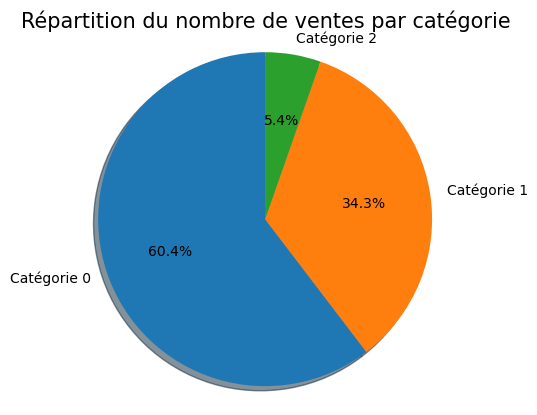

In [97]:
# Visualisation de la répartirion du nombre de ventes par catégorie
name = ['Catégorie 0', 'Catégorie 1','Catégorie 2']
data = [transactions_categ.at[0, 'nb_produits'] , transactions_categ.at[1, 'nb_produits'] , transactions_categ.at[2, 'nb_produits']]

explode=(0, 0,0)
plt.pie(data, explode=explode , labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('Répartition du nombre de ventes par catégorie',fontsize=15)

plt.savefig('nombre_vendus_categ.png')
plt.show()

##### Distribution des âges par catégorie et moyenne

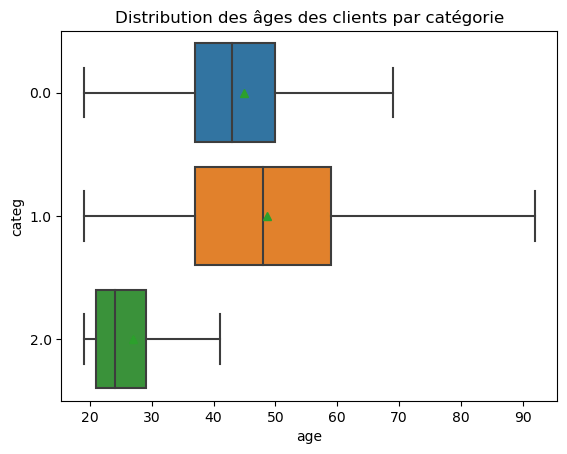

Moyenne d'âge par catégorie categ
0.0    44.907679
1.0    48.650111
2.0    26.942770
Name: age, dtype: float64


In [98]:
# Distribution des âges par catégorie
sns.boxplot(data=transactions, x='age', y='categ', orient='h', showfliers=False, showmeans=True)
plt.title('Distribution des âges des clients par catégorie')
plt.savefig('box_age_categ.png')
plt.show()

# Moyenne d'âge par catégorie
print("Moyenne d'âge par catégorie",transactions.groupby('categ').mean()['age'])

Pour la catégorie 2 semble être acheté par les plus jeunes clients avec une moyenne d'âge à 27 ans.

Les catégories 0 et 1 ont des moyennes assez proches avec respectivement 45 ans et 49 ans.

#### 2.4.2 Top et Flop des ventes <a class="anchor" id="section_2_4_2"></a>

##### Top des ventes

In [99]:
top = CA_produit.sort_values(by = 'nb_produits', ascending = False).head(10)
top

,id_prod,CA,price,categ,nb_produits
2590,1_369,55776.75,23.99,1.0,2325
2640,1_414,53927.29,23.83,1.0,2263
2643,1_417,47500.37,20.99,1.0,2263
2732,1_498,51343.89,23.37,1.0,2197
2652,1_425,36800.34,16.99,1.0,2166
2628,1_403,36501.71,17.99,1.0,2029
2638,1_412,33633.00,16.65,1.0,2020
2631,1_406,49942.53,24.81,1.0,2013
2639,1_413,36141.91,17.99,1.0,2009
2632,1_407,31948.02,15.99,1.0,1998


In [100]:
#  minimum et maximum prices
print("Minimum price:", top['price'].min())
print("Maximum price:", top['price'].max())
print("Moyenne price:", top['price'].mean())

Minimum price: 15.99
Maximum price: 24.81
Moyenne price: 20.259999999999998


Les 10 produits les plus vendus sont vendus en moyenne en 2000 exemplaires, avec un prix moyen de 20€. Ils appartiennent tous à la catégorie 1, catégorie intermédiaire.

##### Flop des ventes

In [101]:
flop = CA_produit.sort_values(by = 'nb_produits', ascending = True).head(20)                                                                   
flop

,id_prod,CA,price,categ,nb_produits
166,0_1151,2.99,2.99,0.0,1
801,0_1728,2.27,2.27,0.0,1
3246,2_81,86.99,86.99,2.0,1
313,0_1284,1.38,1.38,0.0,1
594,0_1539,0.99,0.99,0.0,1
2078,0_807,1.99,1.99,0.0,1
3174,2_23,115.99,115.99,2.0,1
2165,0_886,21.82,21.82,0.0,1
548,0_1498,2.48,2.48,0.0,1
1791,0_549,2.99,2.99,0.0,1


In [102]:
#  minimum et maximum prices
print("Minimum price:", flop['price'].min())
print("Maximum price:", flop['price'].max())

Minimum price: 0.99
Maximum price: 149.74


Le flop des ventes est vendu en un seul exemplaire (20 produits sont concernés). C'est indépendant du prix de vente qui est comprix entre 0.99€ et 149.74€.

## 3 Bilan de l'analyse <a class="anchor" id="chapter3"></a>

Le Chiffre d'affaires total s'élève à quasiment 12 millions d’euros en 2 ans.
L'analyse de l'évolution du chiffre d'affaires dans le temps montre une hausse du CA en milieu d'année 2021, qui se stabilise à un plateau de 500 000 € en début d'année 2022.

La répartition du chiffre d'affaires entre les clients montre une inégalité modérée, avec un indice de Gini de 0,45. 
4 gros clients se démarquent et représentent quasiment 7% des transactions et du chiffre d'affaires total. 


La catégorie 1 a généré le plus grand chiffre d'affaires, tandis que la catégorie 0 a généré le plus grand nombre de ventes. 
La catégorie 2 a généré le moins de ventes et le CA le moins élevé.


Le panier moyen est situé entre 30 et 40€ et est composé en moyenne de 1 à 3 livres.

Les 10 produits les plus vendus appartiennent tous à la catégorie 1, catégorie intermédiaire et sont vendus en moyenne à 2000 exemplaires, tandis que le flop des ventes est vendu en un seul exemplaire et concerne 20 produits dont les prix sont entre 0.99€ et 149.74€.

Il n'y a pas de différence significative entre les distributions de chiffre d'affaires entre les clients masculins et féminins.
Les ventes par catégorie sont similaires entre les hommes et les femmes.
Les hommes et les femmes ont le même comportement d'achat.

Les catégories 0 et 1 sont surtout achetés par les plus de 35 ans alors que la catégorie 2, catégorie la plus chère, est essentiellement achetée par les moins de 34 ans.

La tranche d'âge qui achète le plus est 35-49 ans qui représente quasiment la moitié des ventes, c’est aussi la plus rentable pour l'entreprise générant plus d'1/3 du chiffre d'affaires total.
La tranche d'âge des '65 ans et plus' génère le moins de chiffre d'affaires. 

On note également une  corrélation négative entre l'âge et le chiffre d'affaires, taille du panier moyen et montant du panier moyen.Ce qui signifie que plus le client est jeune:
- plus élevé est le chiffre d'affaires généré
- plus élevé est le montant du panier moyen.

On a pu également établir des Profils d'acheteurs selon les Tranches d'Âge 'Moins de 32 ans','Entre 32 et 51 ans inclusivement'et 'Plus de 51 ans'. 